https://www.kaggle.com/datasets/rabieelkharoua/predict-survival-of-patients-with-heart-failure/code  
https://www.kaggle.com/code/a3amat02/heart-failure-survival-eda-classification-smote

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from IPython.core.display import display, HTML

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.sample(6)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
228  65.0        0                        56         0                 25   
187  60.0        0                      1896         1                 25   
229  72.0        0                       211         0                 25   
147  64.0        0                      1610         0                 60   
136  65.0        1                        59         1                 60   
32   50.0        1                       249         1                 35   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
228                    0   237000.0               5.0           130    0   
187                    0   365000.0               2.1           144    0   
229                    0   274000.0               1.2           134    0   
147                    0   242000.0               1.0           137    1   
136                    0   172000.0               0.9           137    0   
32                     1   319000.0               1.0           128    0   

     smoking  time  DEATH_EVENT  
228        0   207            0  
187        0   172            1  
229        0   207            0  
147        0   113            0  
136        0   107            0  
32         0    28            1

In [4]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [5]:
df.shape

(299, 13)

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
categoricals = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]
numericals = ["ejection_fraction", "creatinine_phosphokinase", "serum_sodium", "age", "time", "platelets", "serum_creatinine"]

1- What's the relationship of creatinine_phosphokinase with all the categories?  
2- What's the relationship of ejection_fraction with all the categories ?  
3- What's the relationship of all the categorical varaibles with each other ?  
4- Specifically, what's the relationship of death_event with all the other categorical variables ?  
5- What's the relationship of each and every numerical column with every categorical column ?  

<Axes: >

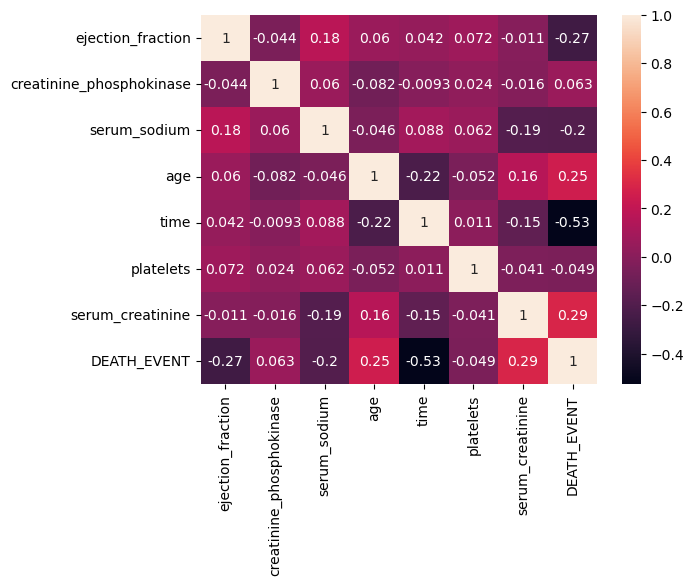

In [8]:
sns.heatmap(df[numericals + ["DEATH_EVENT"]].corr(), annot = True)

DEATH_EVENT has a strong correlation with all the numerical variables. We will check how creatinine_phosphokinase is related to death.

<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

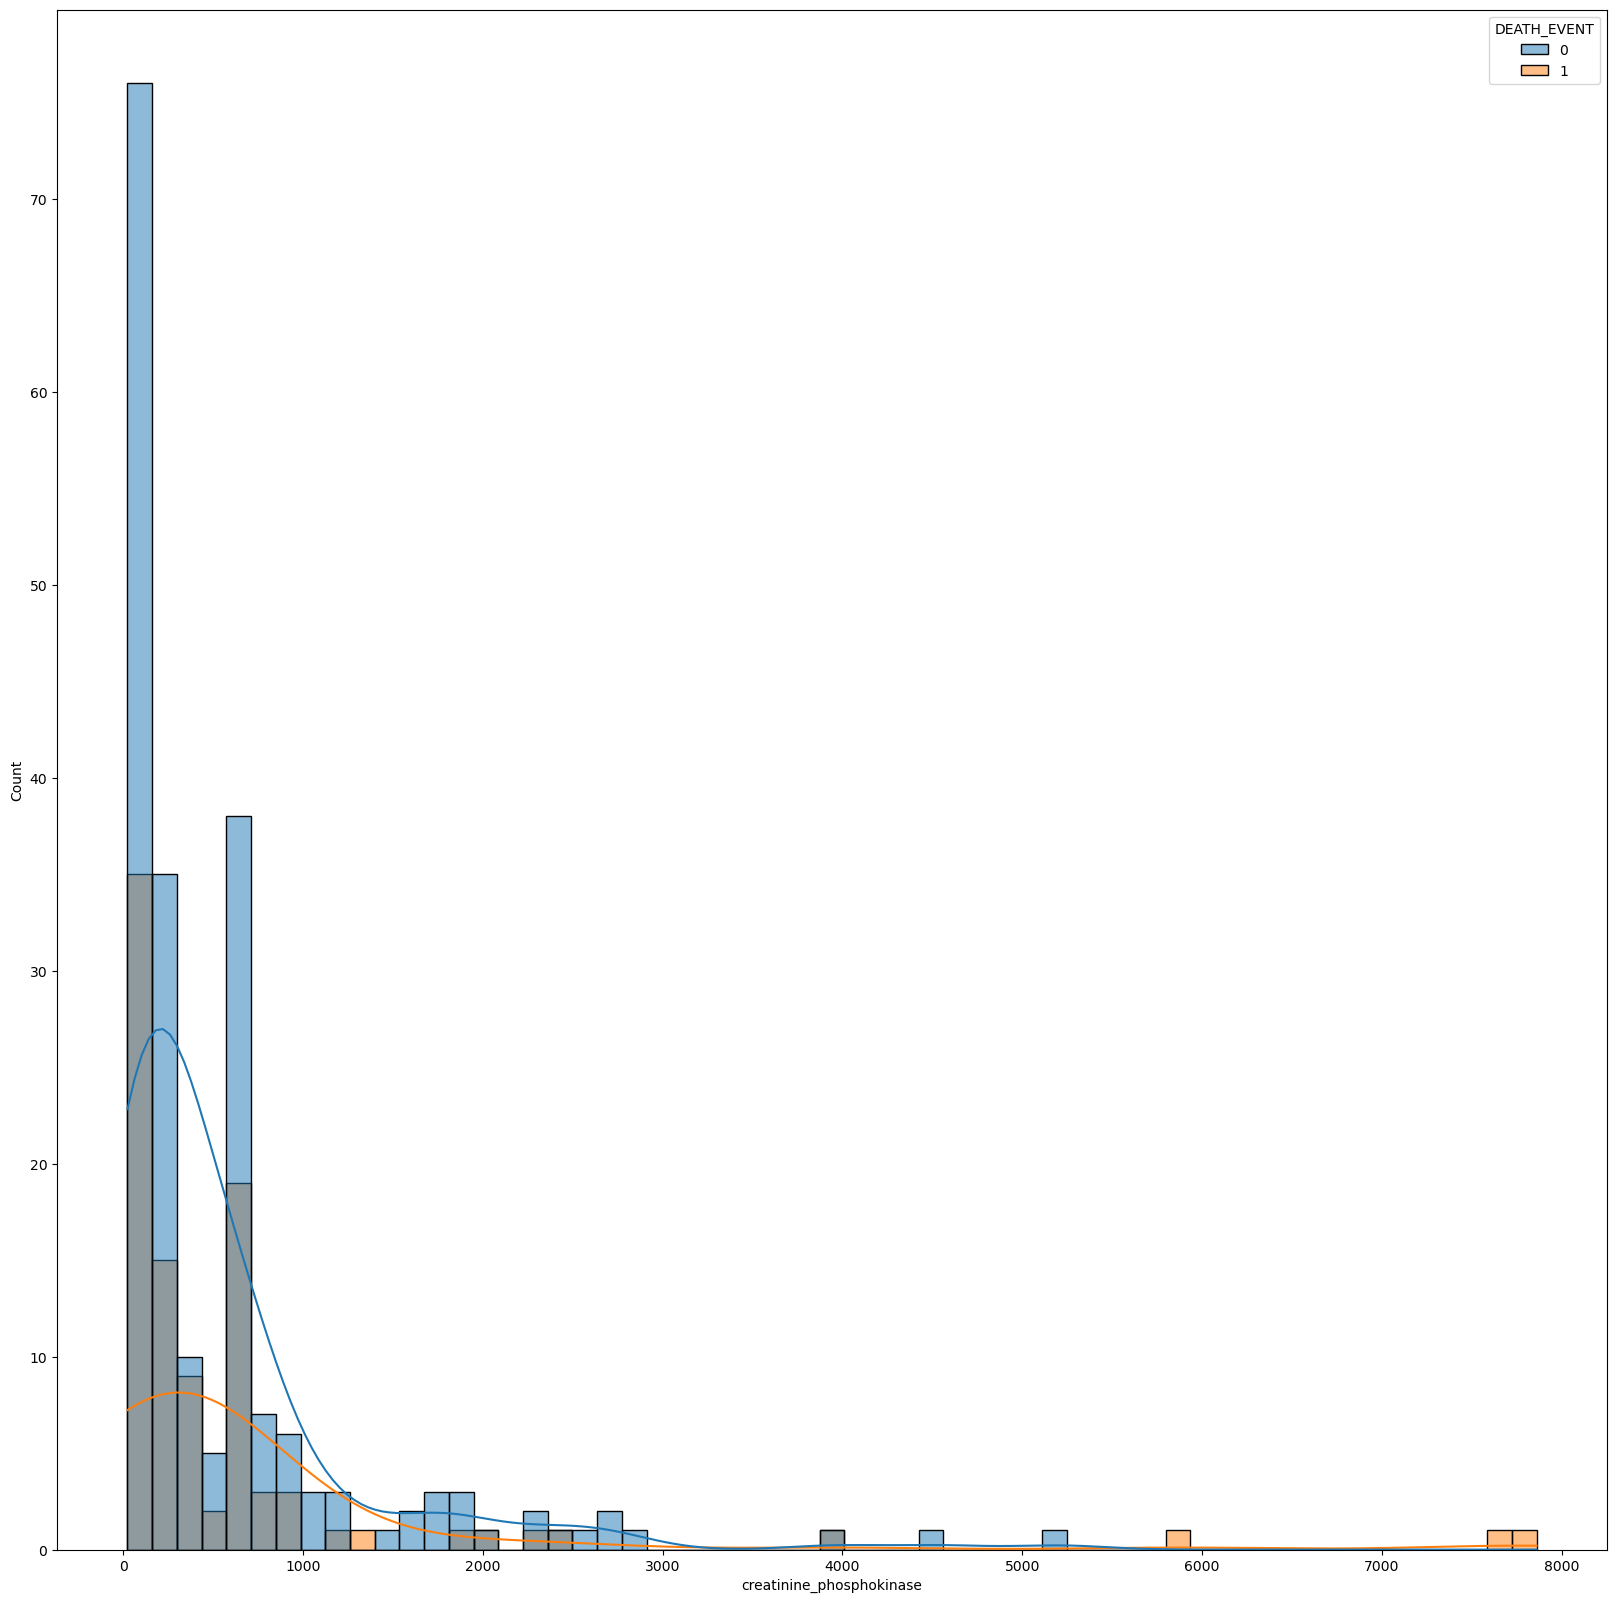

In [9]:
plt.figure(figsize = (20, 20))
sns.histplot(x = df["creatinine_phosphokinase"], hue = df["DEATH_EVENT"], kde = True)

High-Levels of creatinine_phosphokinase may lead to a heart failure nut there is a slight chance of it beacause the probability of survival and death becomes almost 50-50 at high levels of creatinine_phosphokinase.

<Axes: xlabel='serum_sodium', ylabel='Density'>

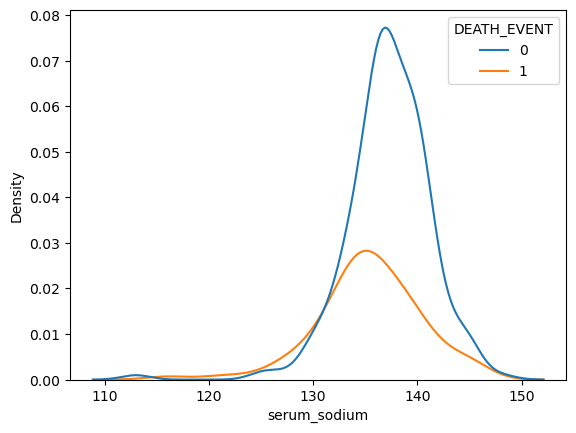

In [10]:
sns.kdeplot(x = df["serum_sodium"], hue = df["DEATH_EVENT"])

Low level of sodium creatinine leads to heart failure

<Axes: xlabel='creatinine_phosphokinase', ylabel='Density'>

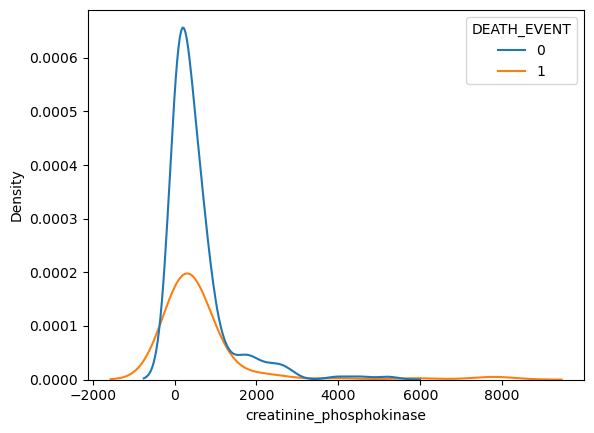

In [11]:
sns.kdeplot(x = df["creatinine_phosphokinase"], hue = df["DEATH_EVENT"])

<Axes: xlabel='smoking', ylabel='Density'>

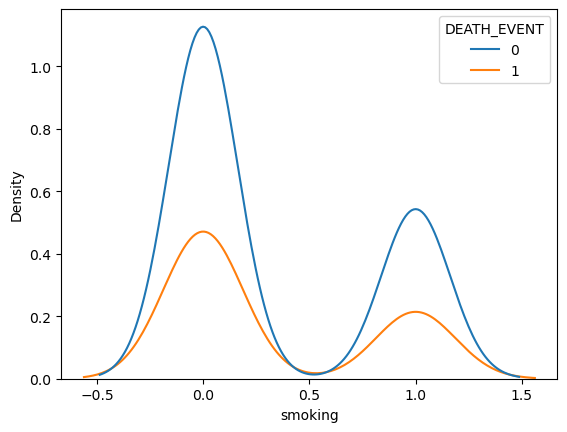

In [12]:
sns.kdeplot(x = df["smoking"], hue = df["DEATH_EVENT"])

<Axes: xlabel='age', ylabel='Density'>

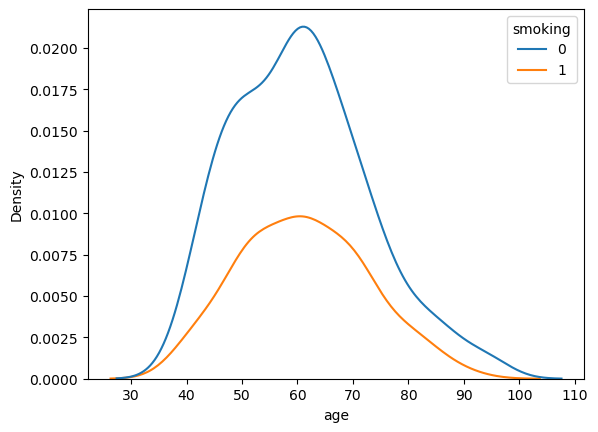

In [13]:
sns.kdeplot(hue = df["smoking"], x = df["age"])

In [14]:
df["smoking"].value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

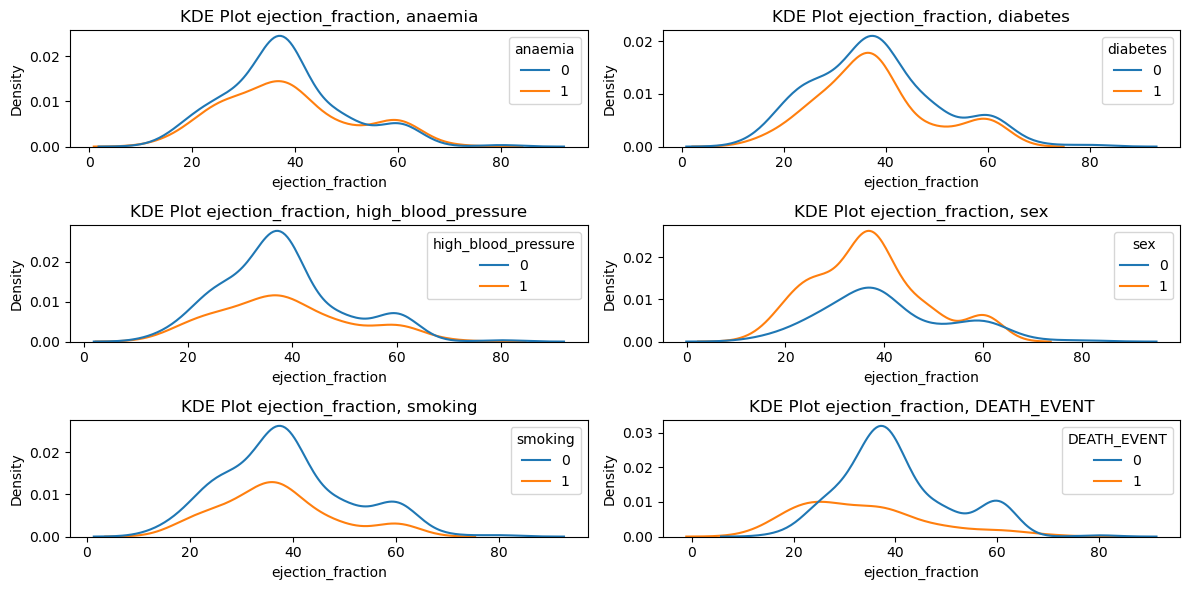

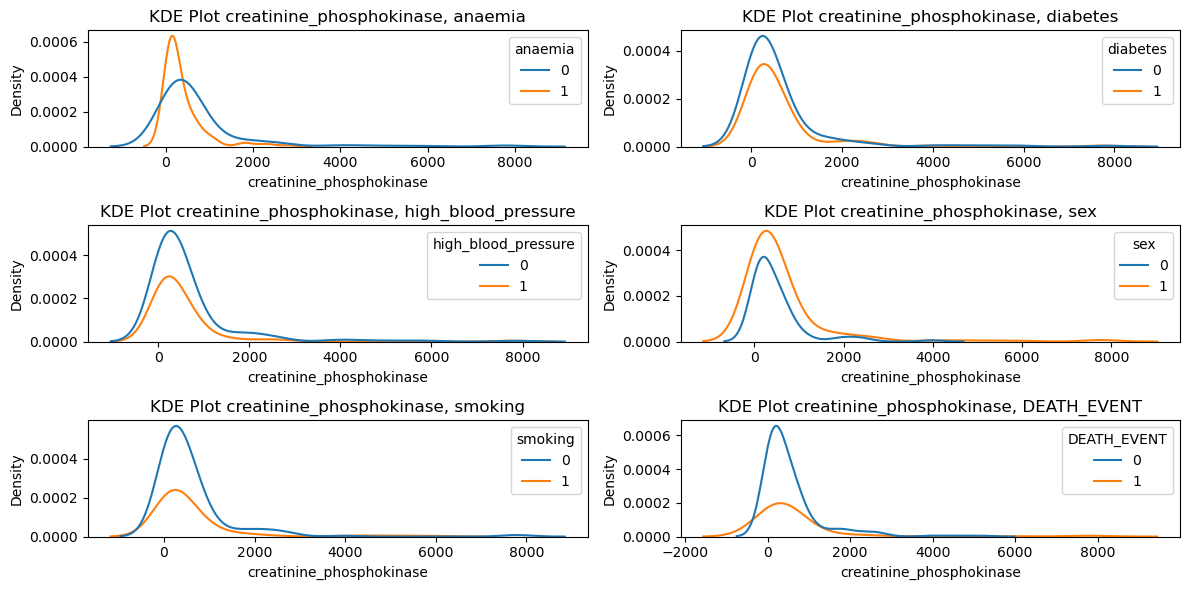

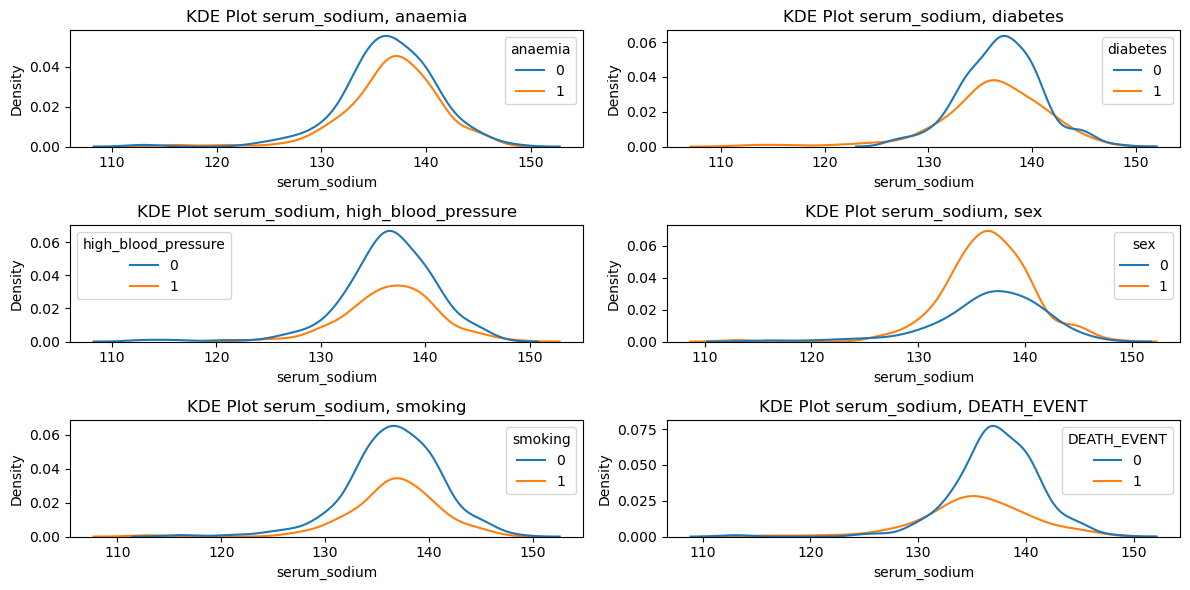

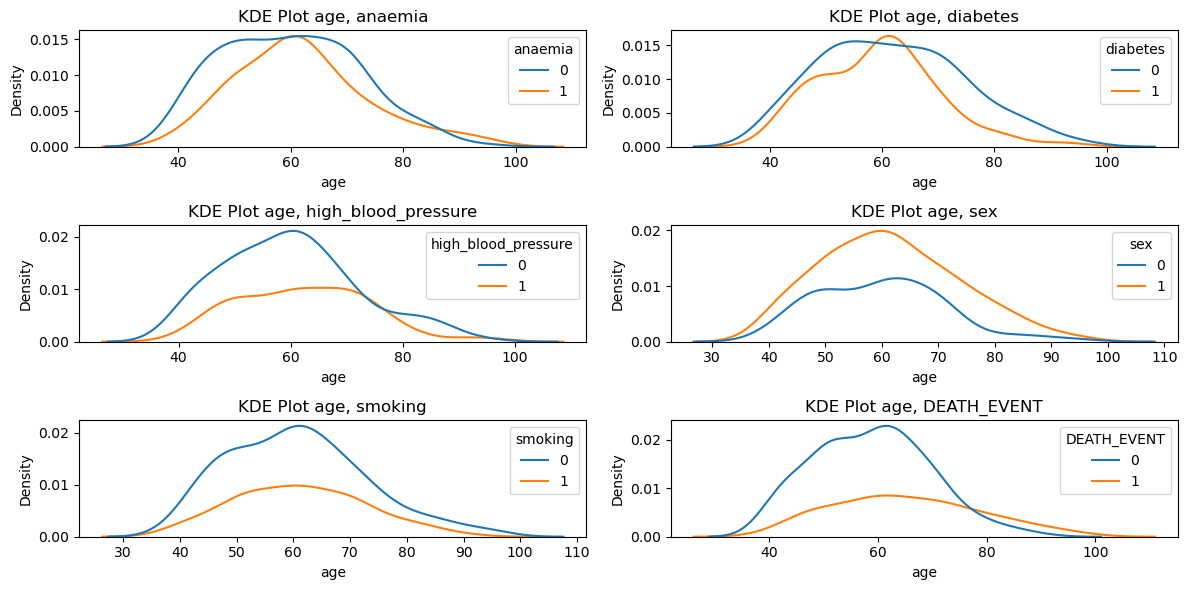

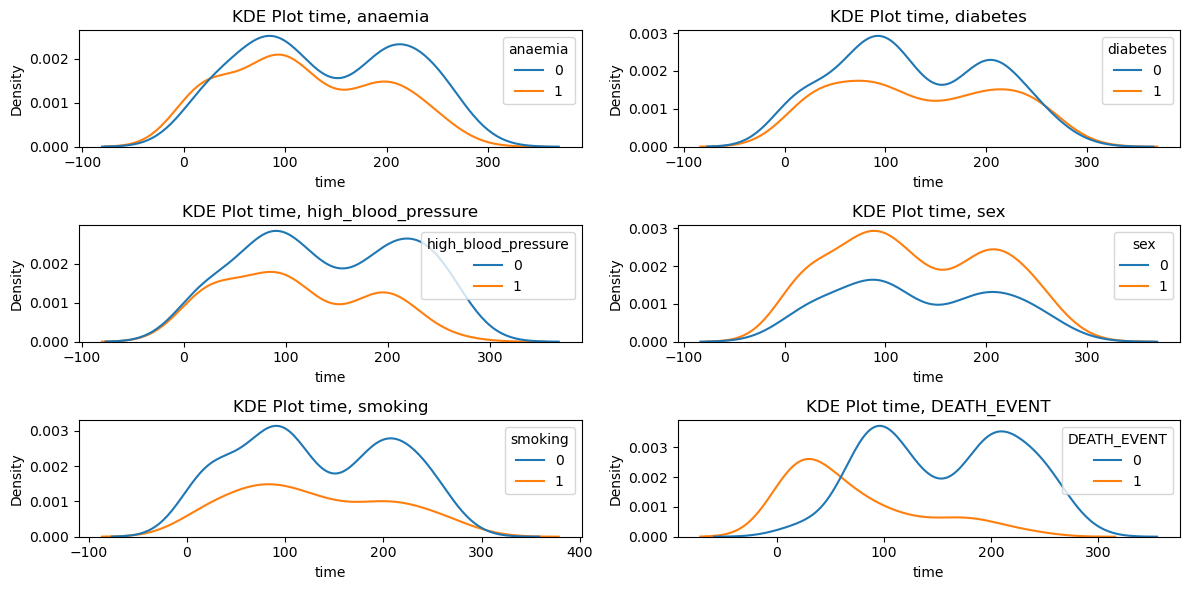

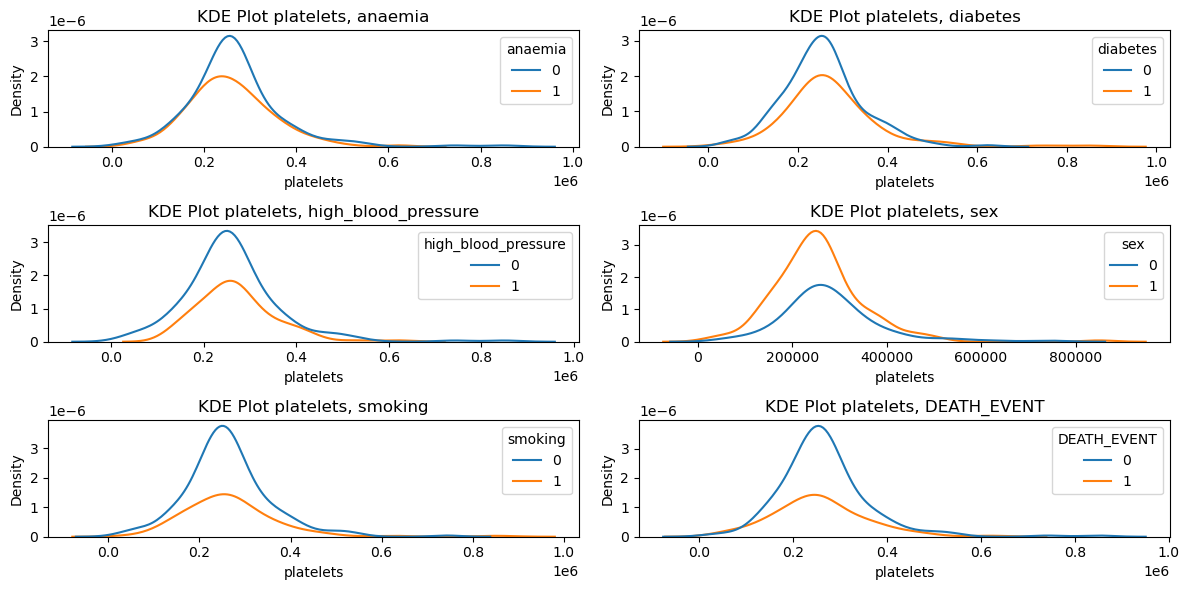

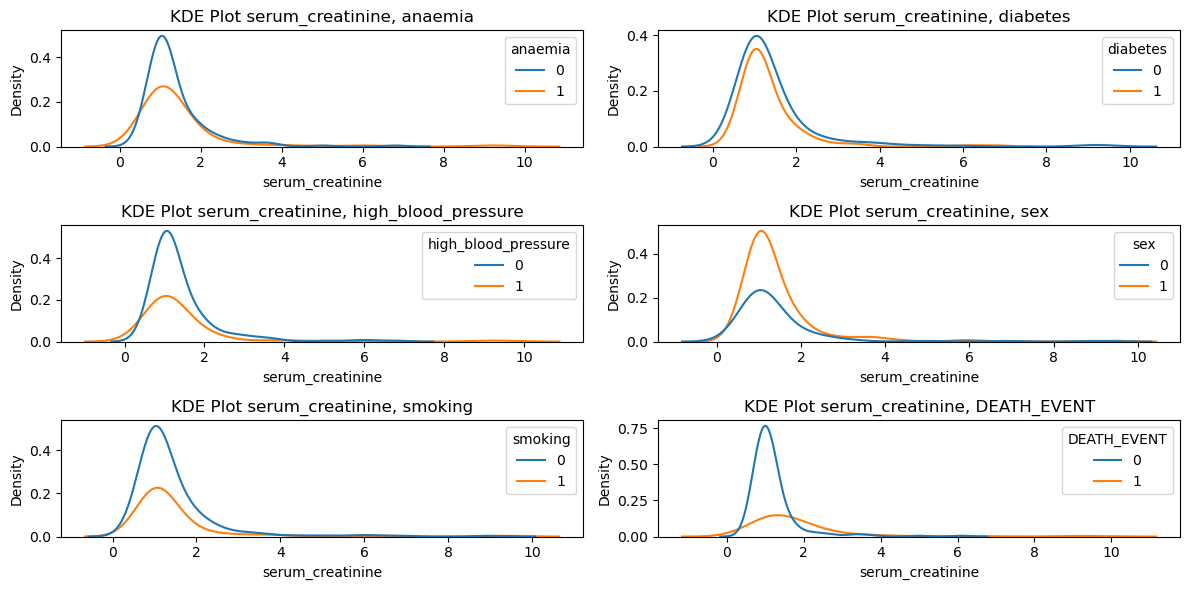

In [15]:
i = 0
j=0
for l in range(len(numericals)):
    fig, axis = plt.subplots(3, 2, figsize = (12, 6))
    j = 0
    for i in range(3):
        for k in range(2):
            if j >= 6:
                break
            sns.kdeplot(x = df[numericals[l]], hue = df[categoricals[j]], ax = axis[i][k])
            axis[i, k].set_title(f"KDE Plot {numericals[l]}, {categoricals[j]}")  # Add informative titles
            axis[i, k].set_xlabel(numericals[l])
            axis[i, k].set_ylabel("Density")
            j += 1
    plt.tight_layout()  # Adjust spacing to prevent overlapping elements
    plt.show()
    
    for m in range(6):
        print()

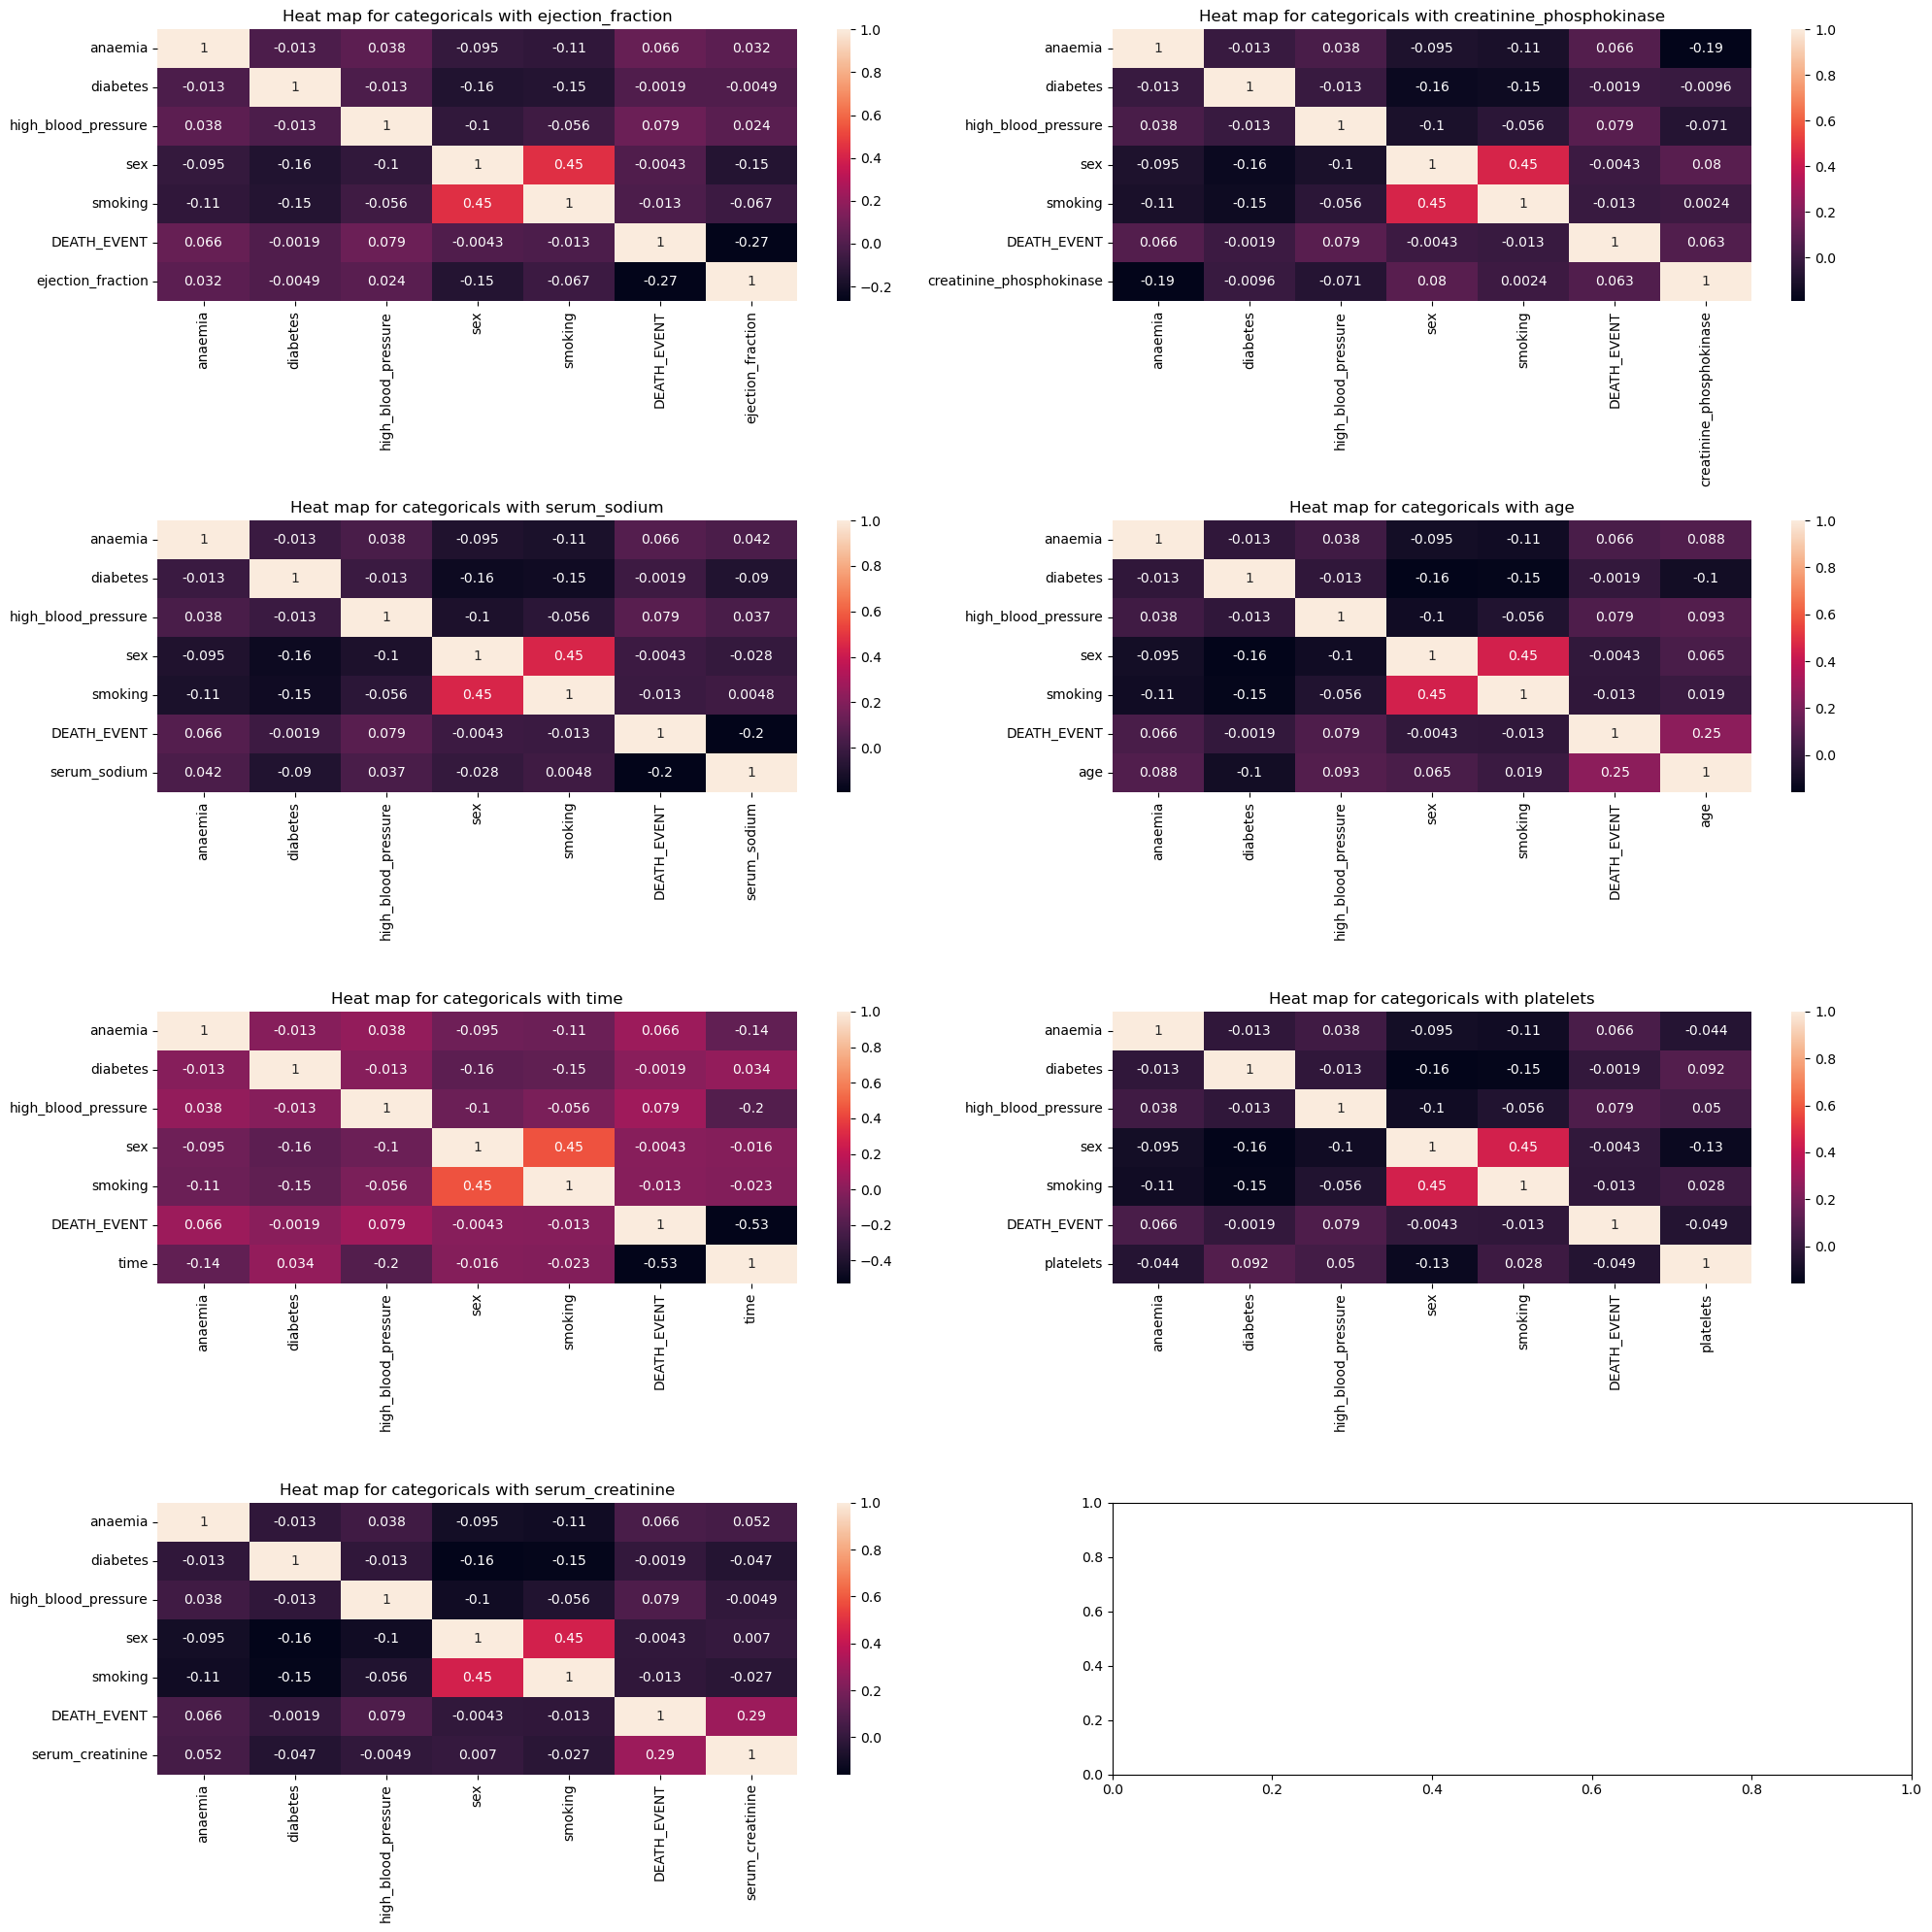

In [16]:
categoricals = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]
numericals = ["ejection_fraction", "creatinine_phosphokinase", "serum_sodium", "age", "time", "platelets", "serum_creatinine"]

index = 0
fig, axis = plt.subplots(4, 2, figsize = (20, 20))
for j in range(4):
    for k in range(2):
        if index >= 7:
            break
        sns.heatmap(df[categoricals + [numericals[index]]].corr(), annot = True, ax = axis[j][k])
        axis[j][k].set_title(f"Heat map for categoricals with {numericals[index]}")
        index = index + 1
plt.tight_layout()
plt.show()

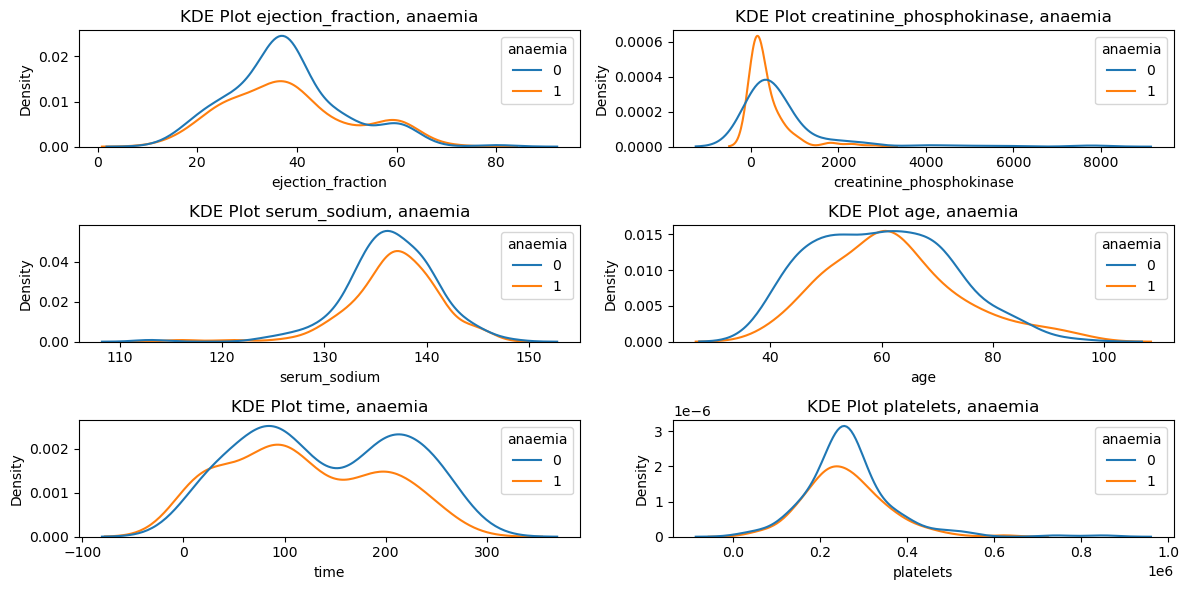

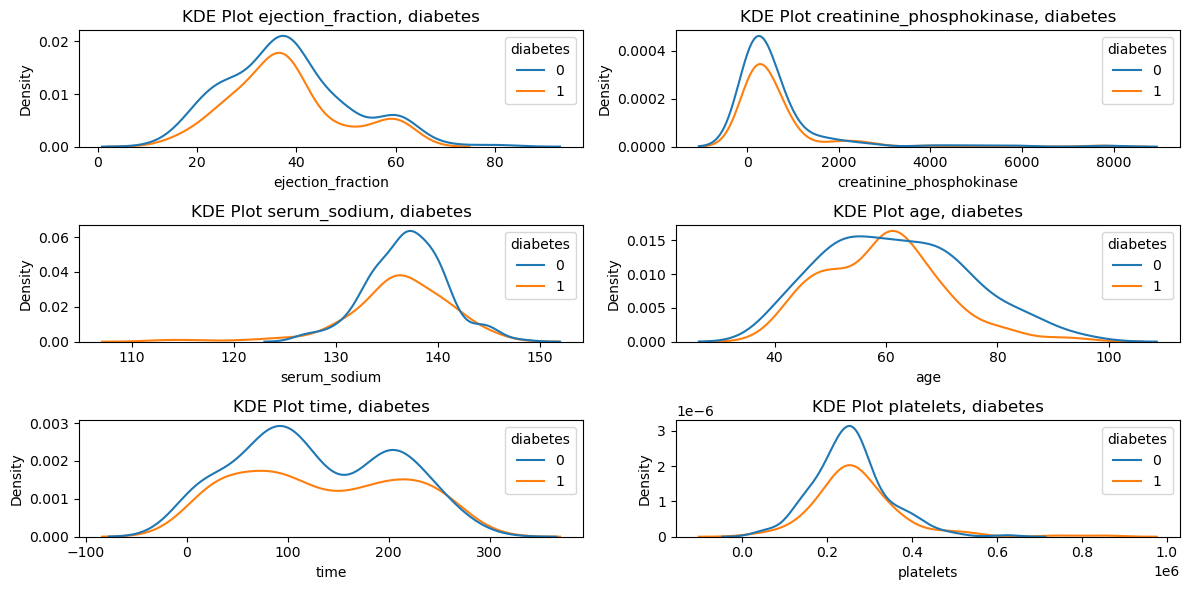

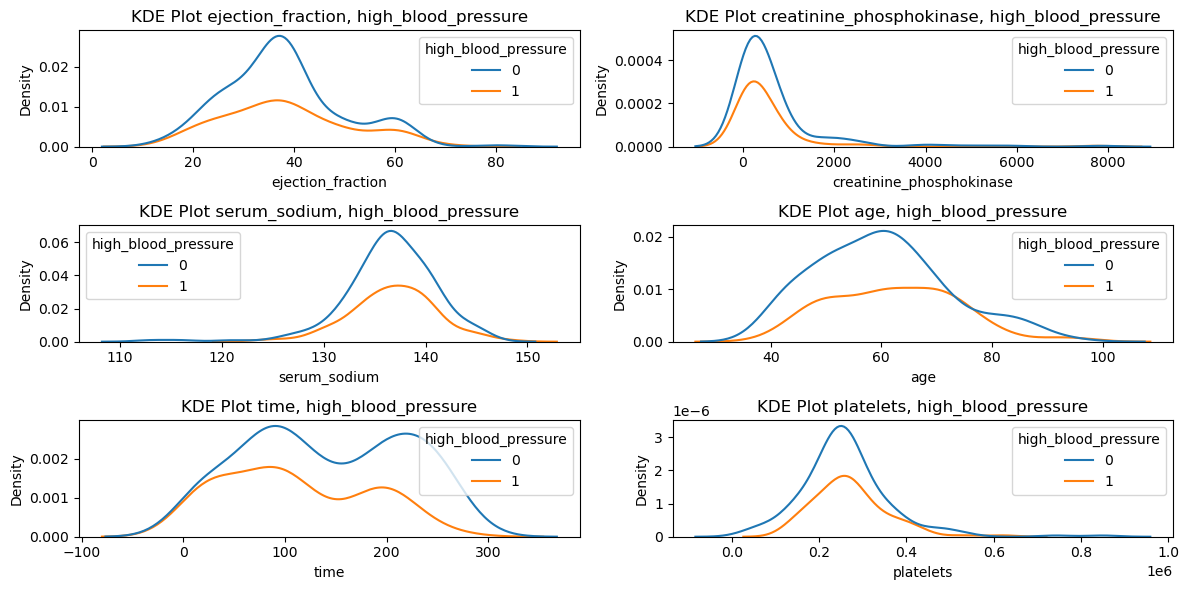

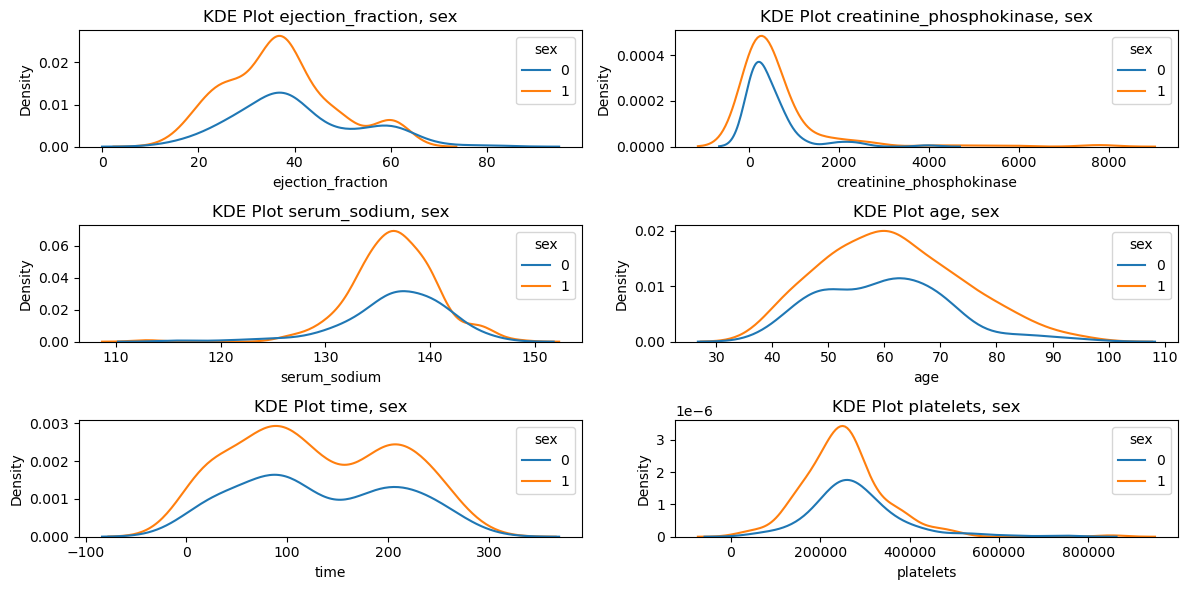

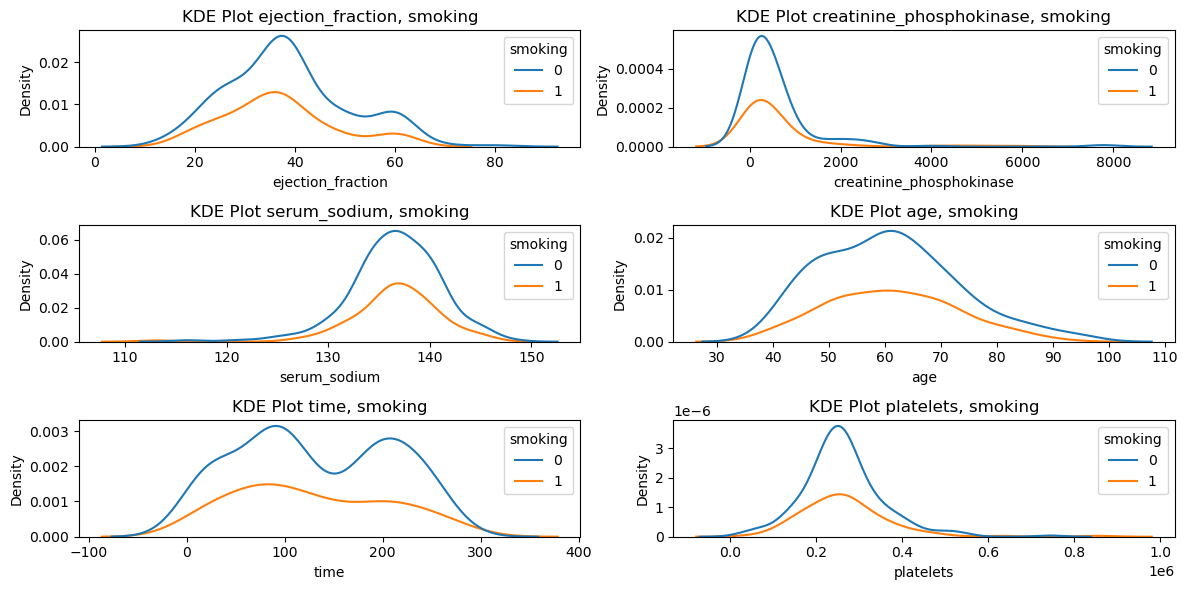

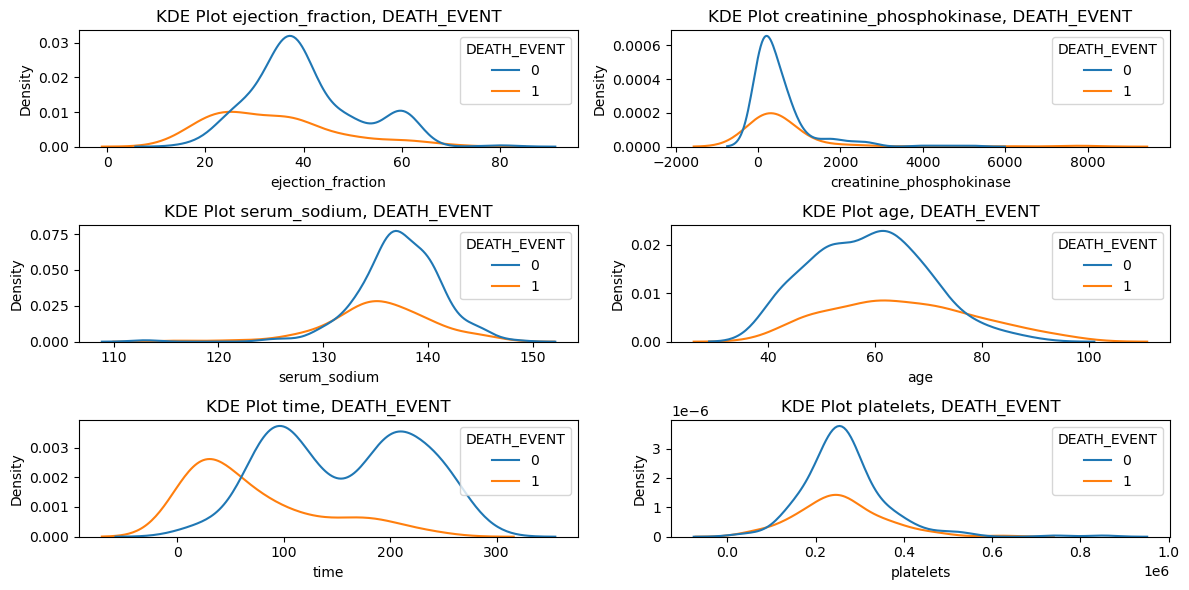

In [17]:
i = 0
j = 0
for l in range(len(categoricals)):
    fig, axis = plt.subplots(3, 2, figsize = (12, 6))
    j = 0
    for i in range(3):
        for k in range(2):
            sns.kdeplot(x = df[numericals[j]], hue = df[categoricals[l]], ax = axis[i][k])
            axis[i, k].set_title(f"KDE Plot {numericals[j]}, {categoricals[l]}")  # Add informative titles
            axis[i, k].set_xlabel(numericals[j])
            axis[i, k].set_ylabel("Density")
            j += 1
    plt.tight_layout()  # Adjust spacing to prevent overlapping elements
    plt.show()
    
    for m in range(6):
        print()

In [18]:
crosstabs = []
for i in range(len(categoricals)):
    for j in range(len(categoricals)):
        if i != j:
            crosstabs += [pd.crosstab(df[categoricals[i]], df[categoricals[j]])]

In [19]:
len(crosstabs)

30

In [20]:
crosstabs

[diabetes   0   1
 anaemia         
 0         98  72
 1         76  53,
 high_blood_pressure    0   1
 anaemia                     
 0                    113  57
 1                     81  48,
 sex       0    1
 anaemia         
 0        53  117
 1        52   77,
 smoking    0   1
 anaemia         
 0        108  62
 1         95  34,
 DEATH_EVENT    0   1
 anaemia             
 0            120  50
 1             83  46,
 anaemia    0   1
 diabetes        
 0         98  76
 1         72  53,
 high_blood_pressure    0   1
 diabetes                    
 0                    112  62
 1                     82  43,
 sex        0    1
 diabetes         
 0         50  124
 1         55   70,
 smoking     0   1
 diabetes         
 0         108  66
 1          95  30,
 DEATH_EVENT    0   1
 diabetes            
 0            118  56
 1             85  40,
 anaemia                0   1
 high_blood_pressure         
 0                    113  81
 1                     57  48,
 diabetes    

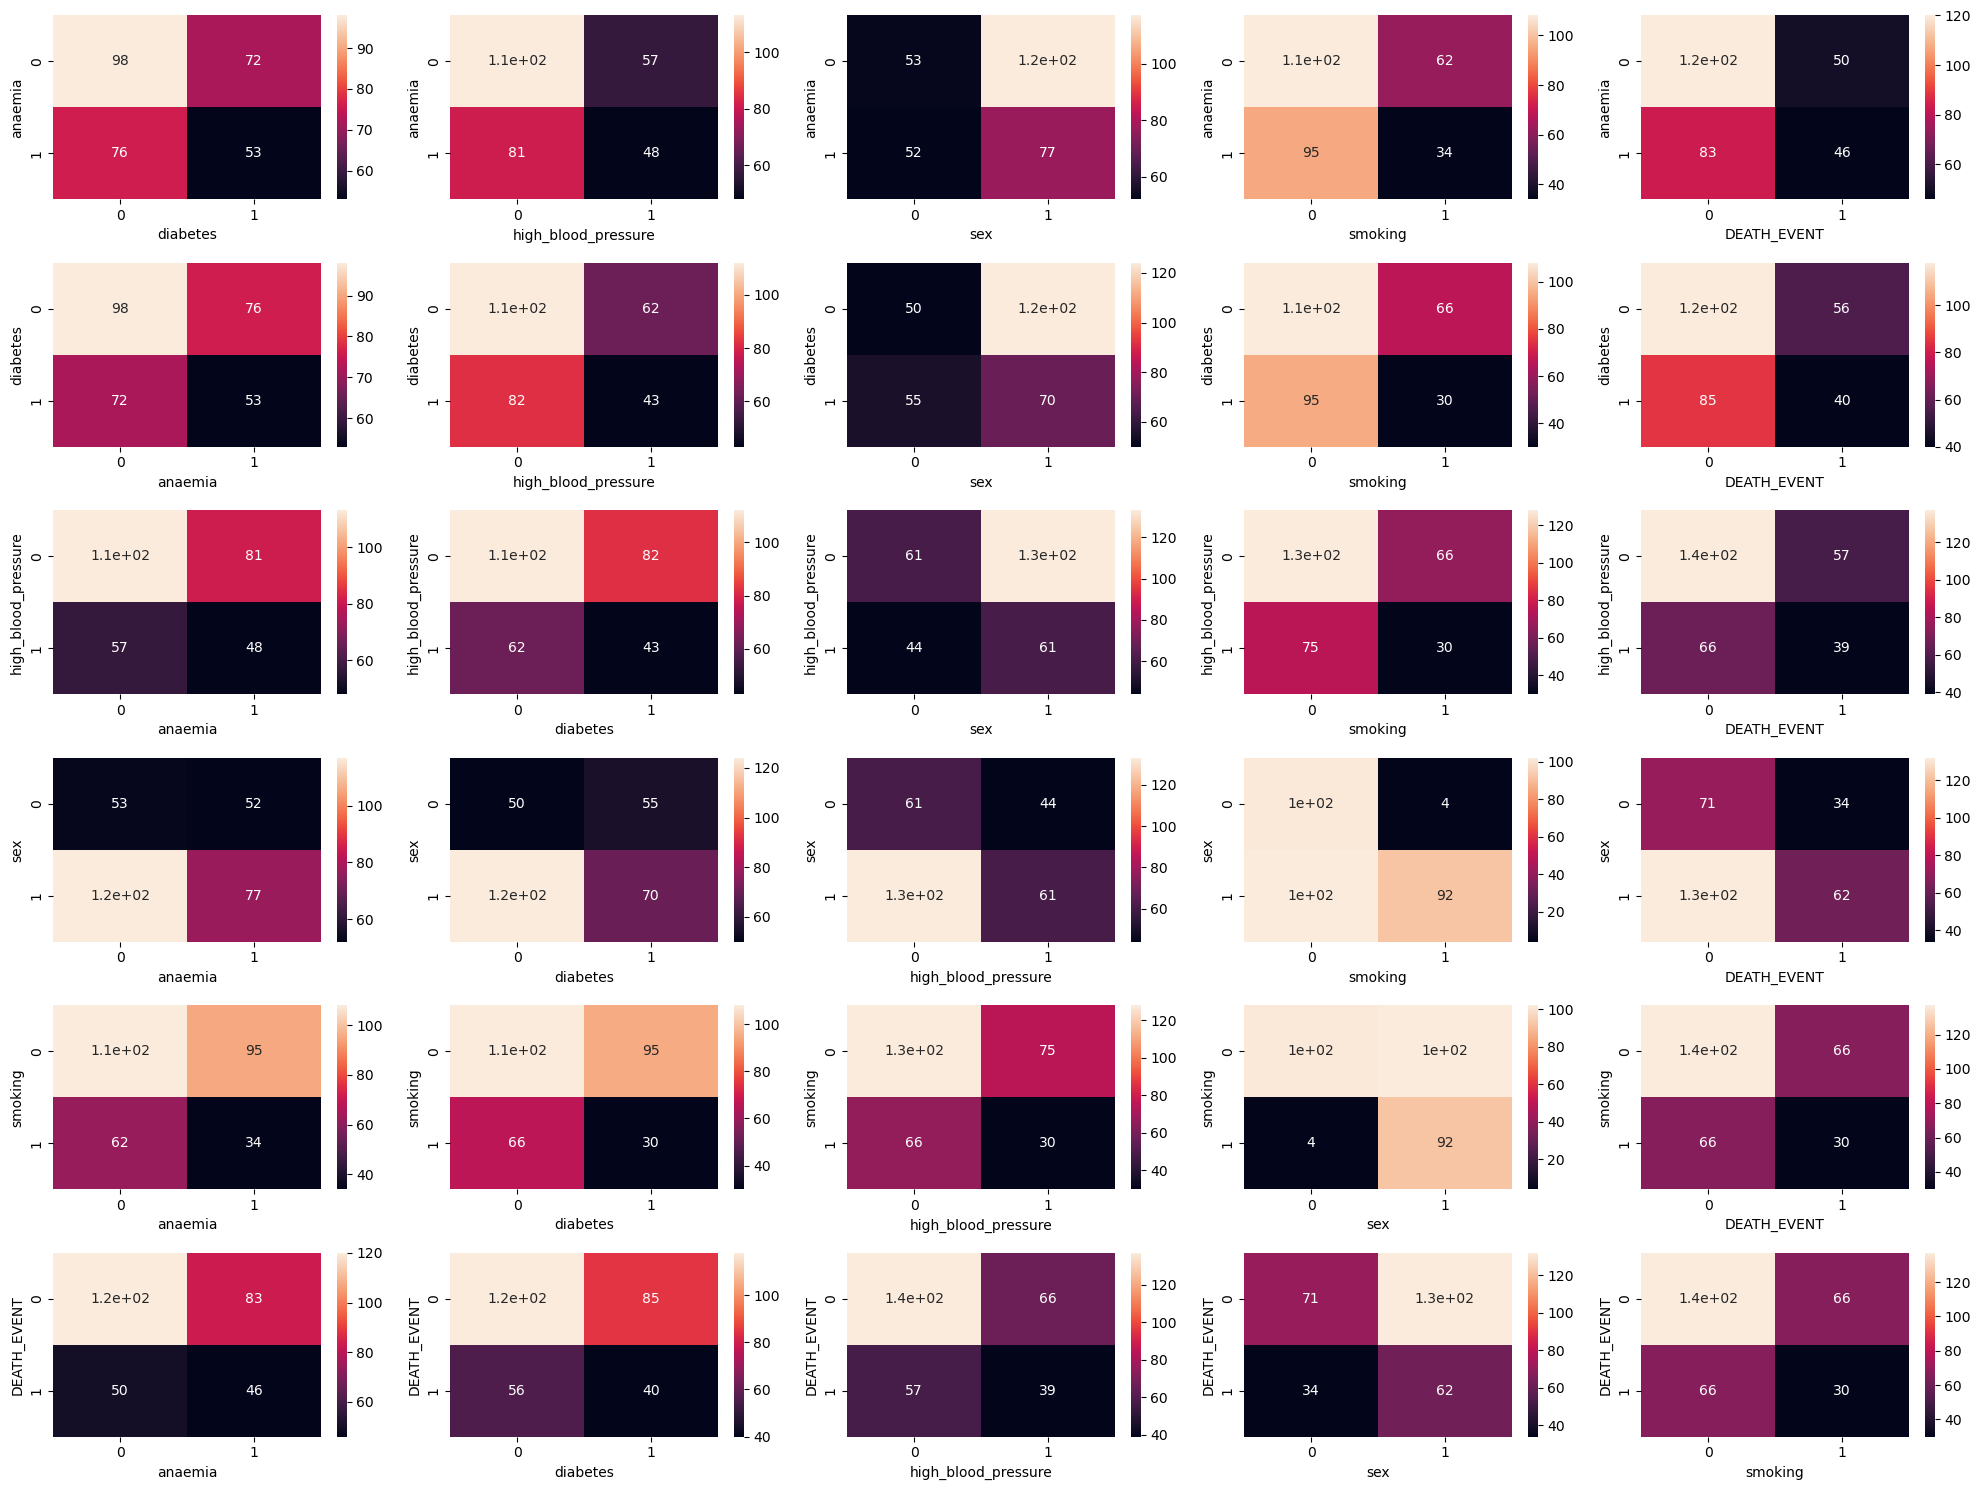

In [21]:
fig, axis = plt.subplots(6, 5, figsize = (20, 15))
index = 0
for i in range(6):
    for j in range(5):
        sns.heatmap(crosstabs[index], annot = True, ax = axis[i][j])
        index += 1

plt.tight_layout()
plt.show()

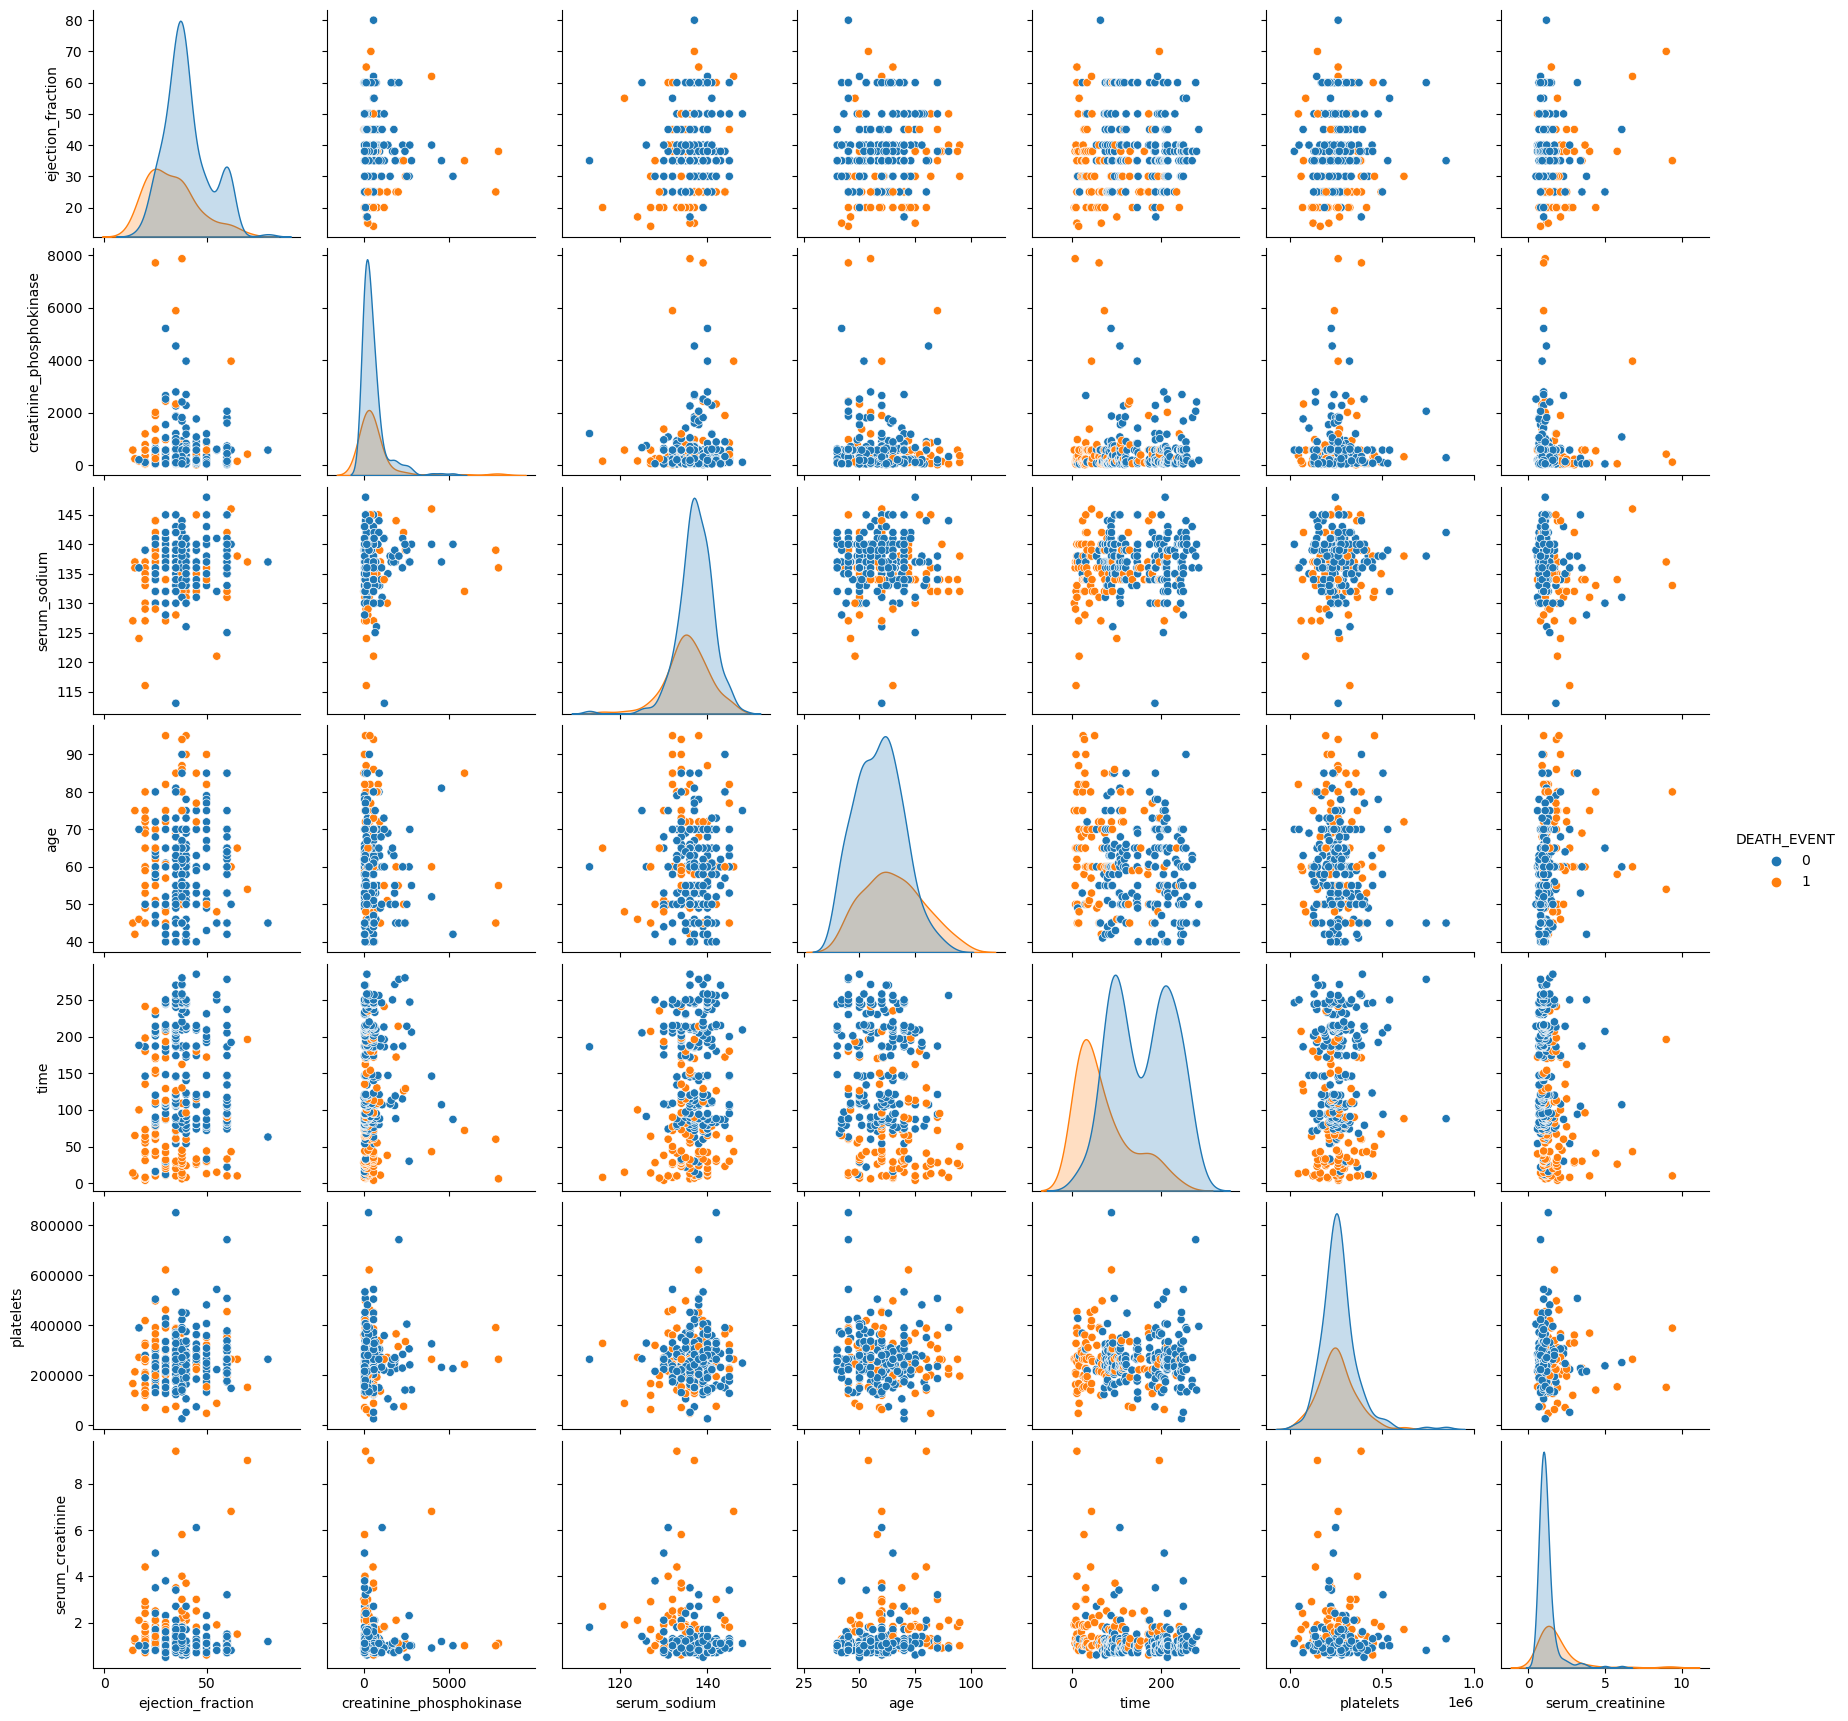

In [22]:
sns.pairplot(df, vars=numericals, hue="DEATH_EVENT")
plt.show()

In [23]:
def plots(df, name, num, axis):
    group = df.groupby(name)
    mean = group[num].mean()
    sns.barplot(x=mean.index, y=mean, ax=axis)

In [24]:
def bar_label(axis, _type="edge", rotation=0):
    for container in axis.containers:
        axis.bar_label(container, label_type=_type, rotation=rotation)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

In [25]:
numericals = ["ejection_fraction", "creatinine_phosphokinase", "serum_sodium", "age", "time", "platelets", 'serum_creatinine']

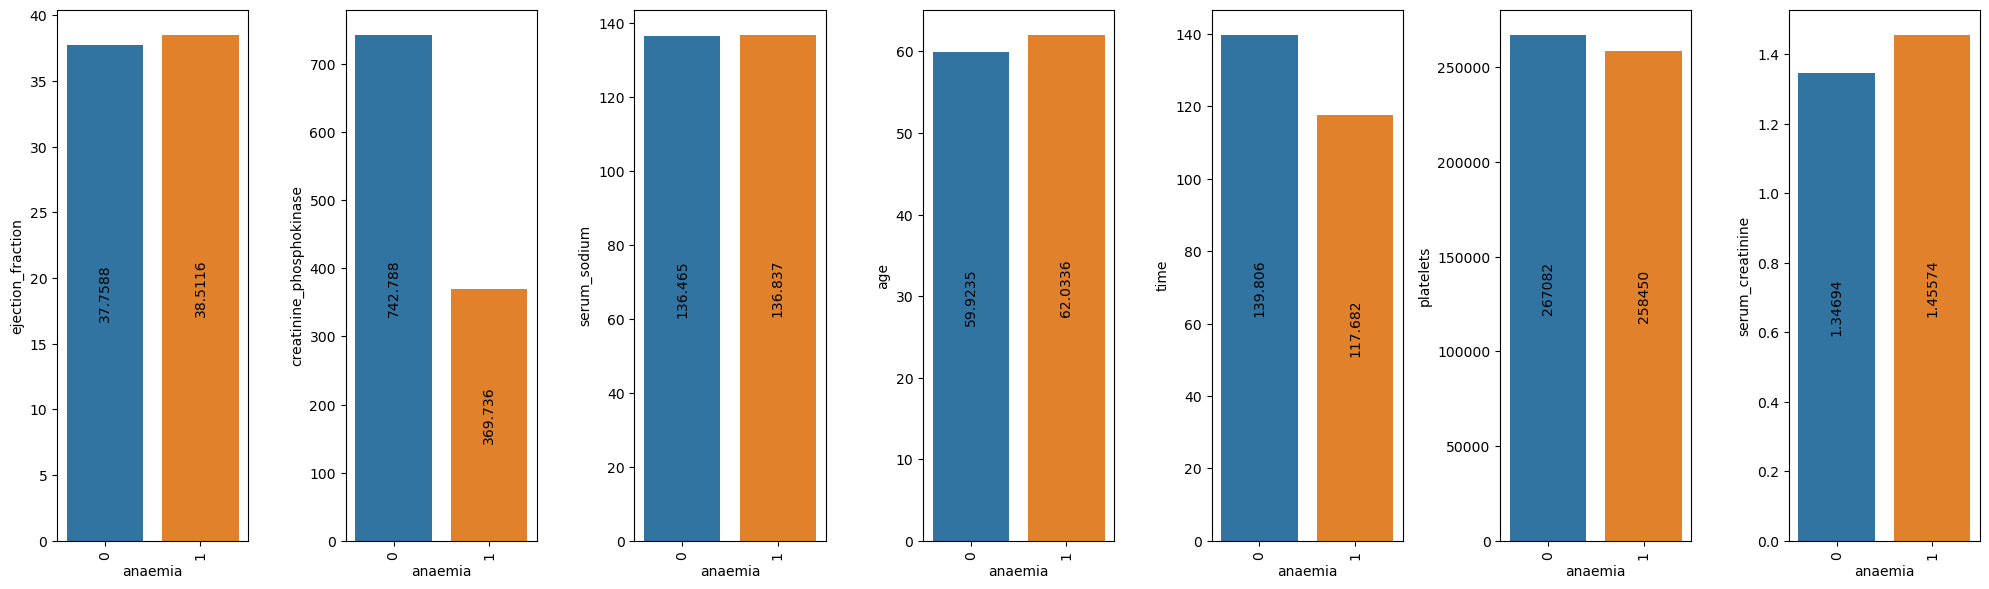

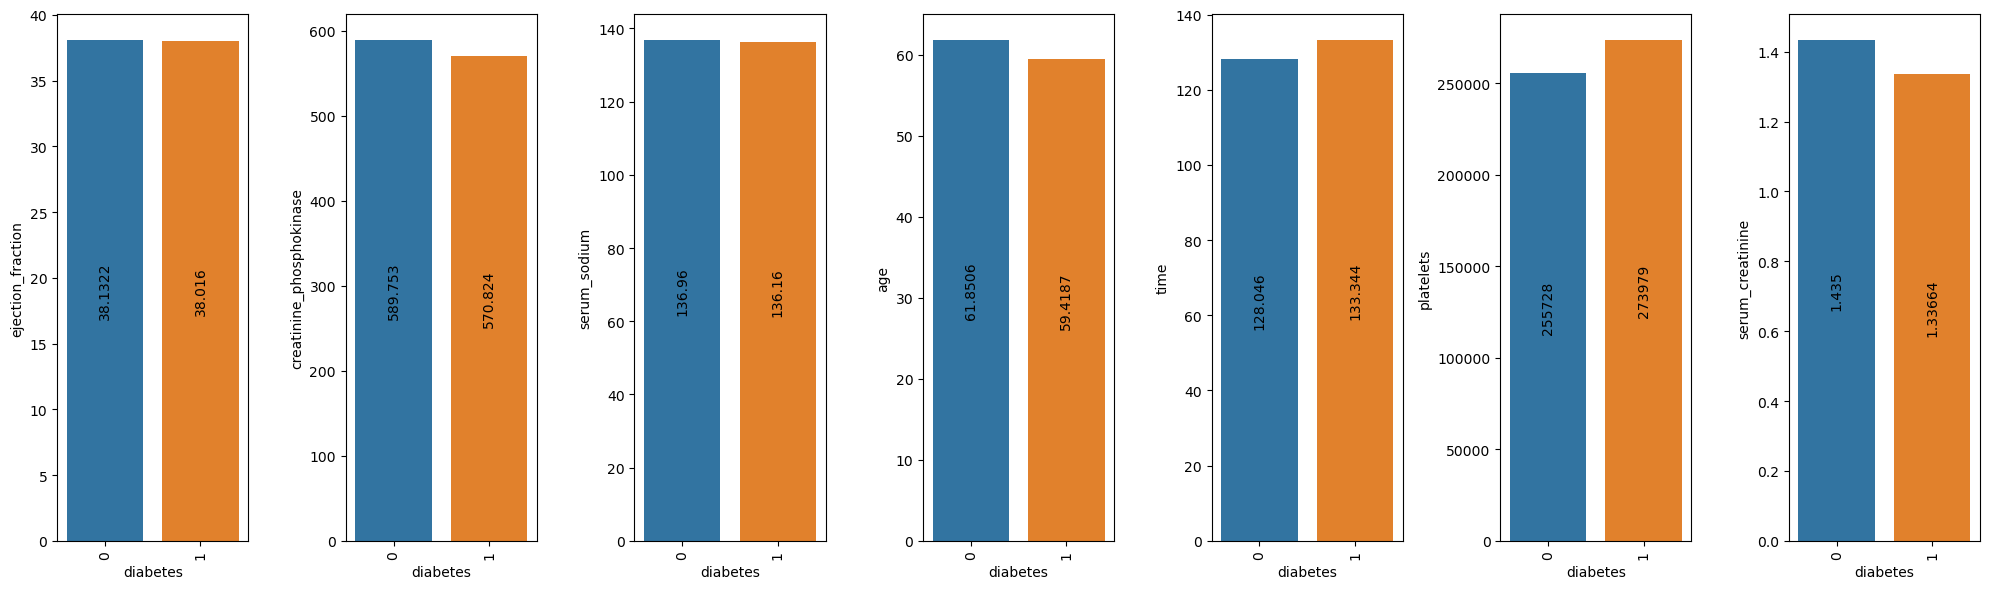

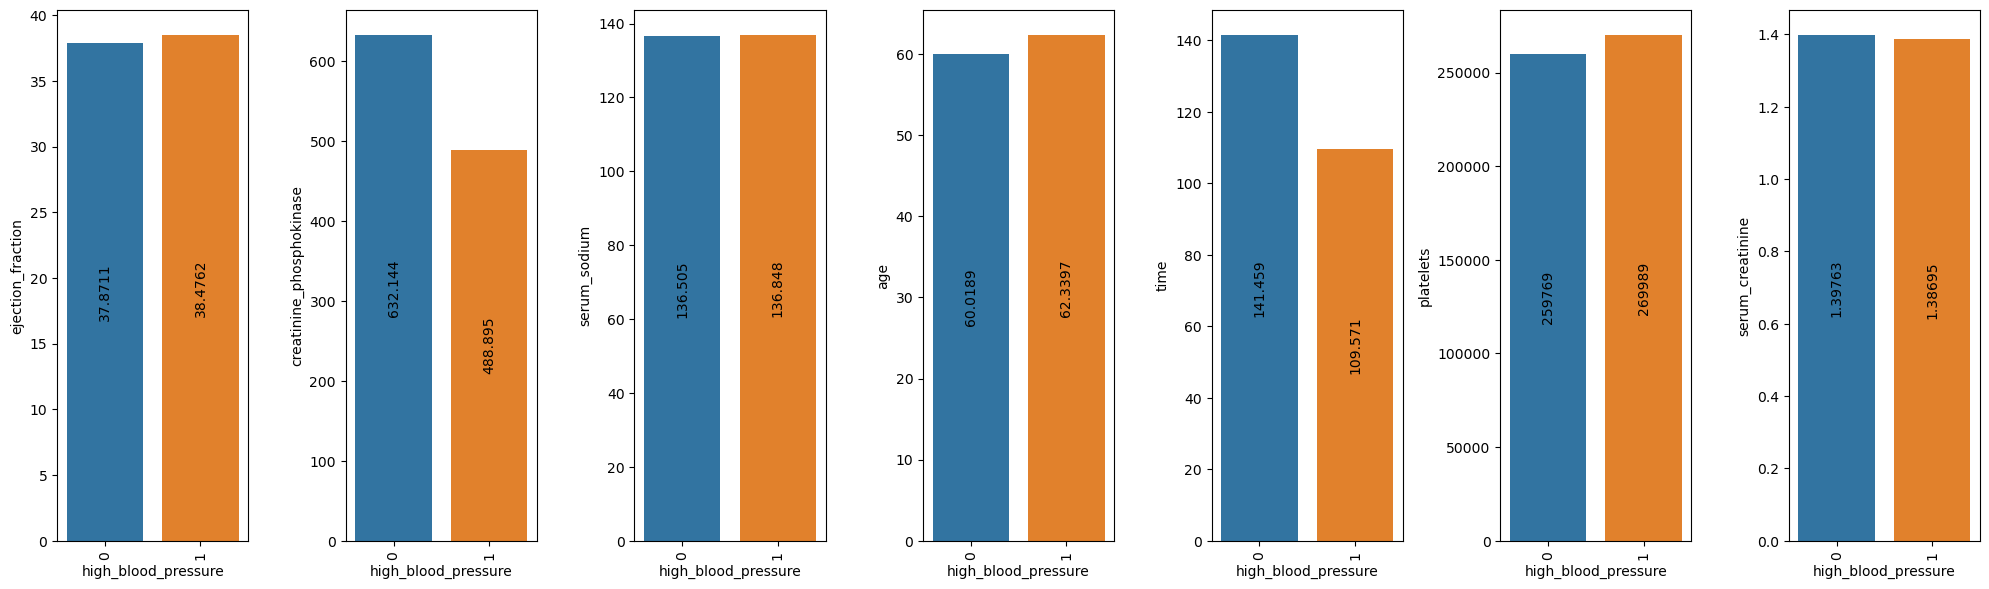

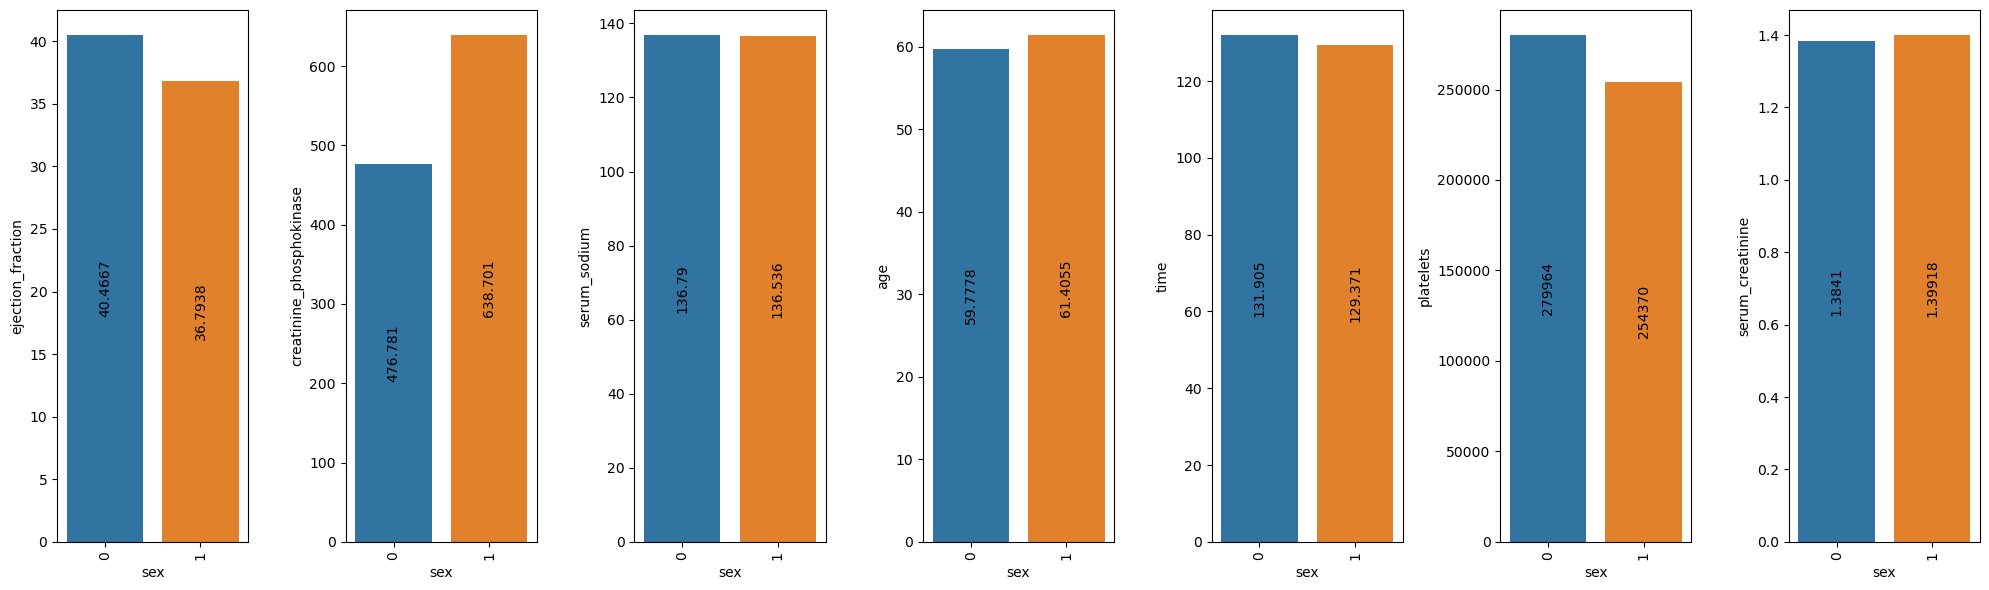

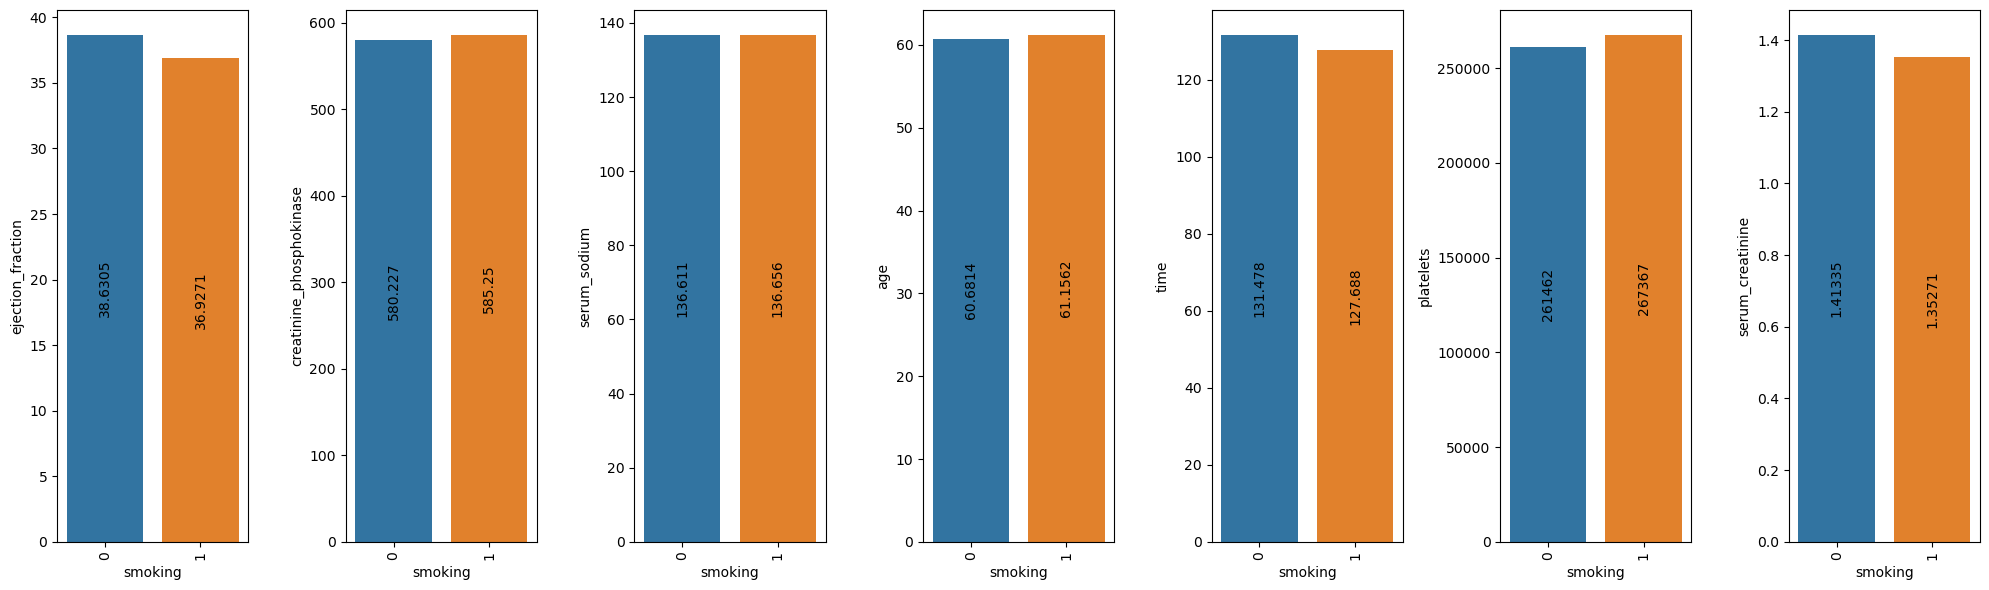

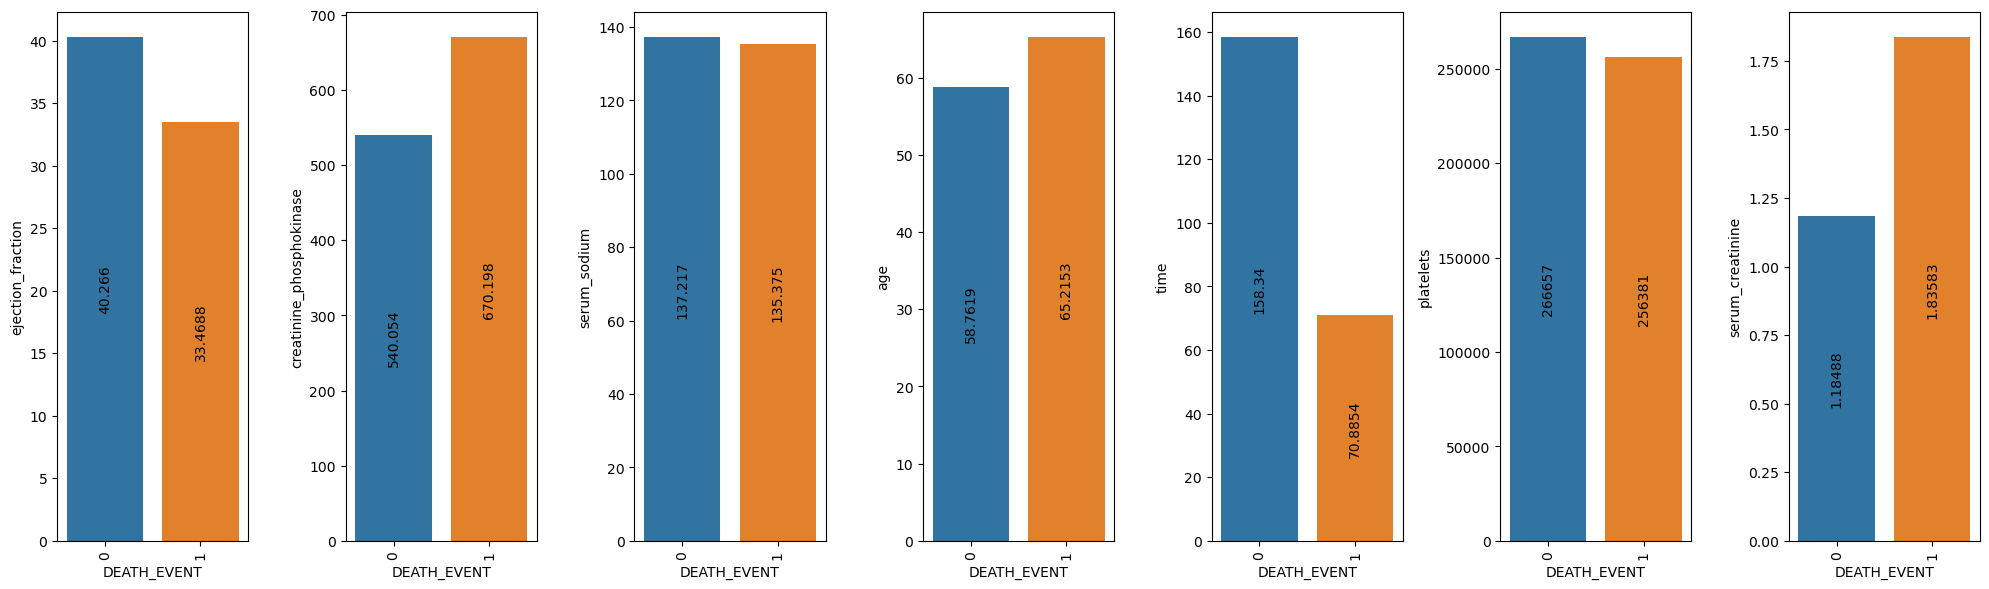

In [26]:
for i in categoricals:
    fig, axis = plt.subplots(1, 7, figsize=(20, 6))
    for j, k in enumerate(numericals):
        plots(df, i, k, axis[j])
        bar_label(axis[j], "center", 90)
    plt.tight_layout()
    plt.show()

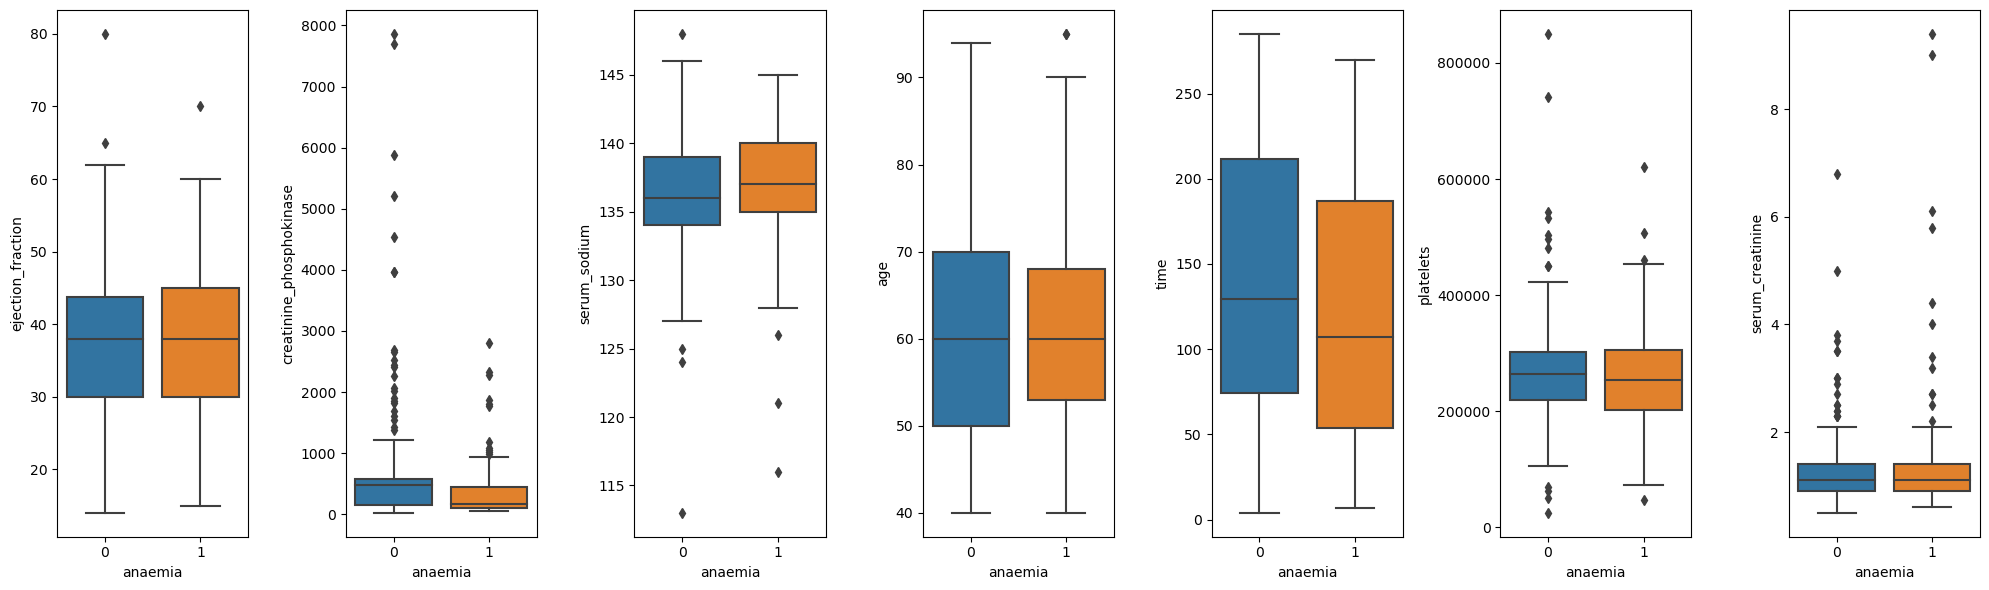

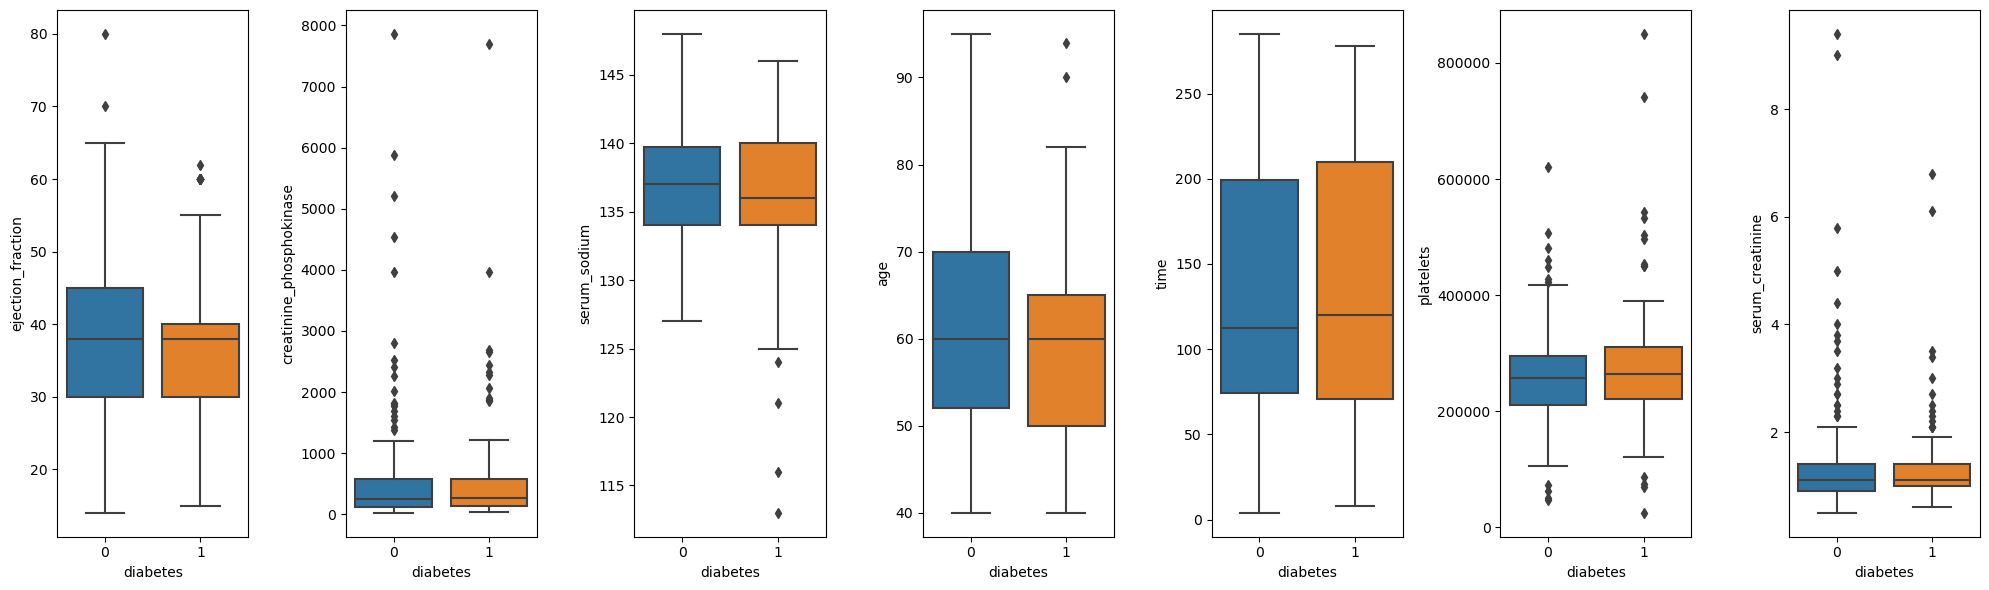

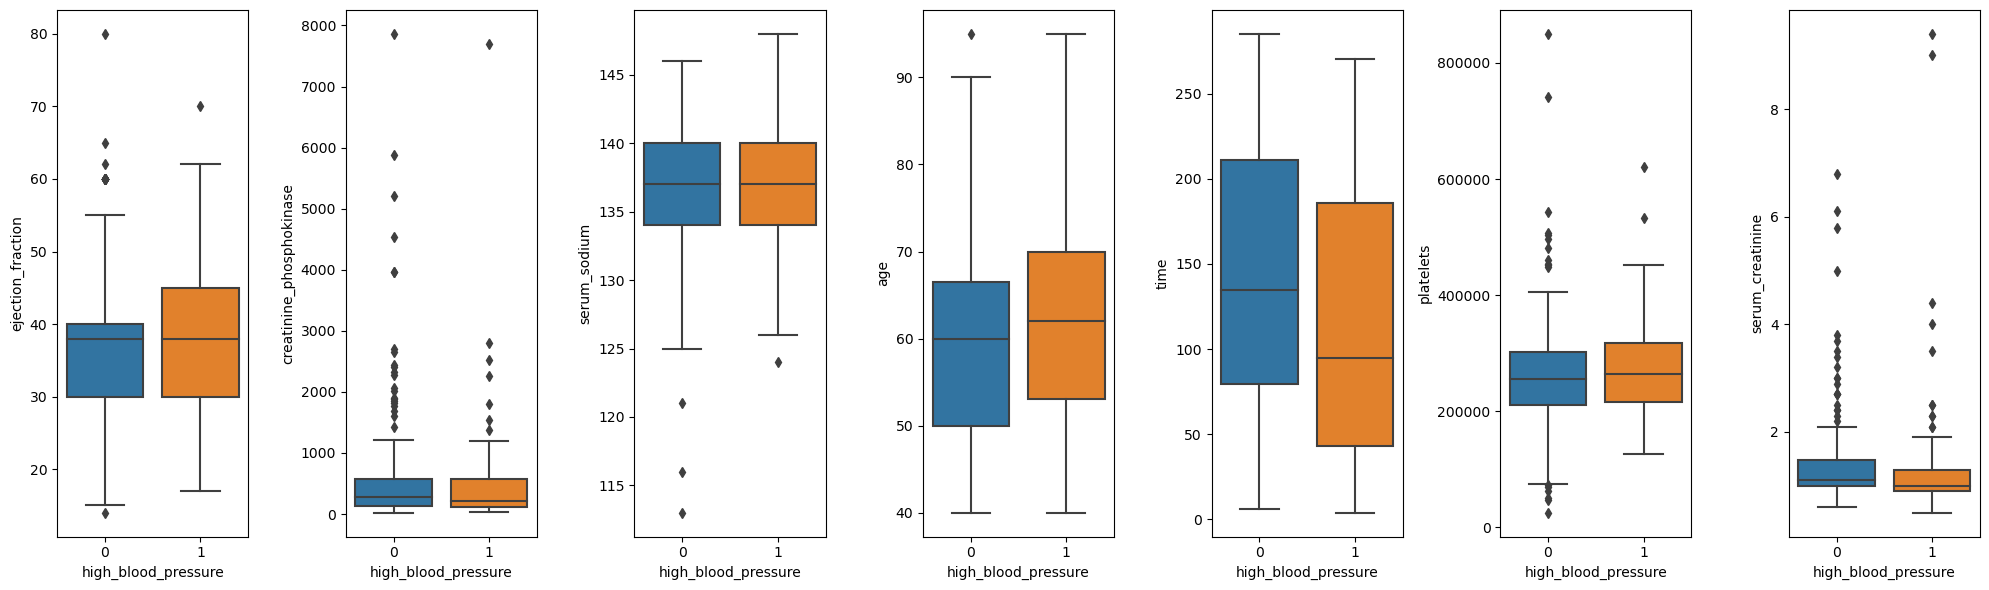

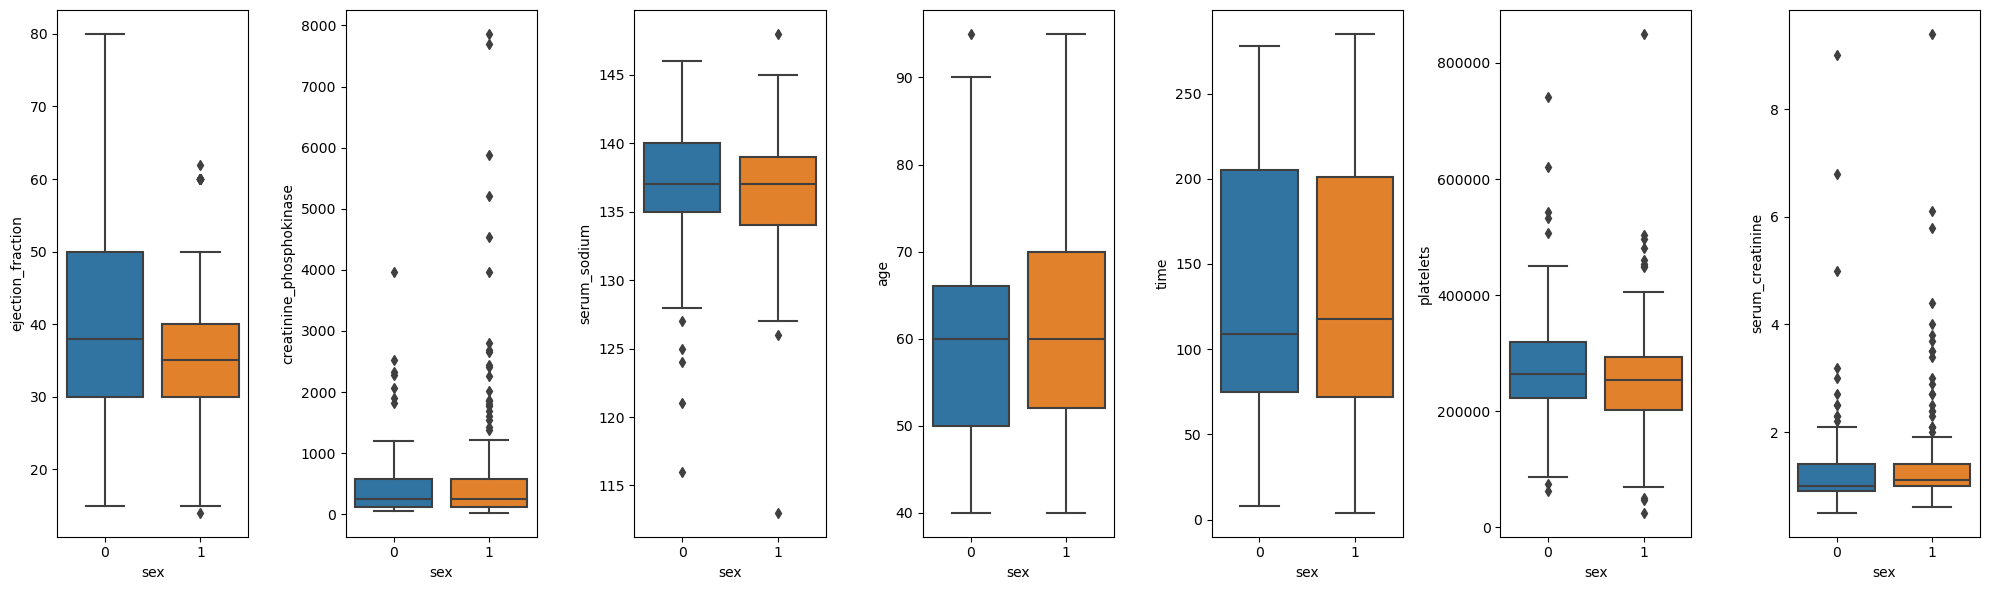

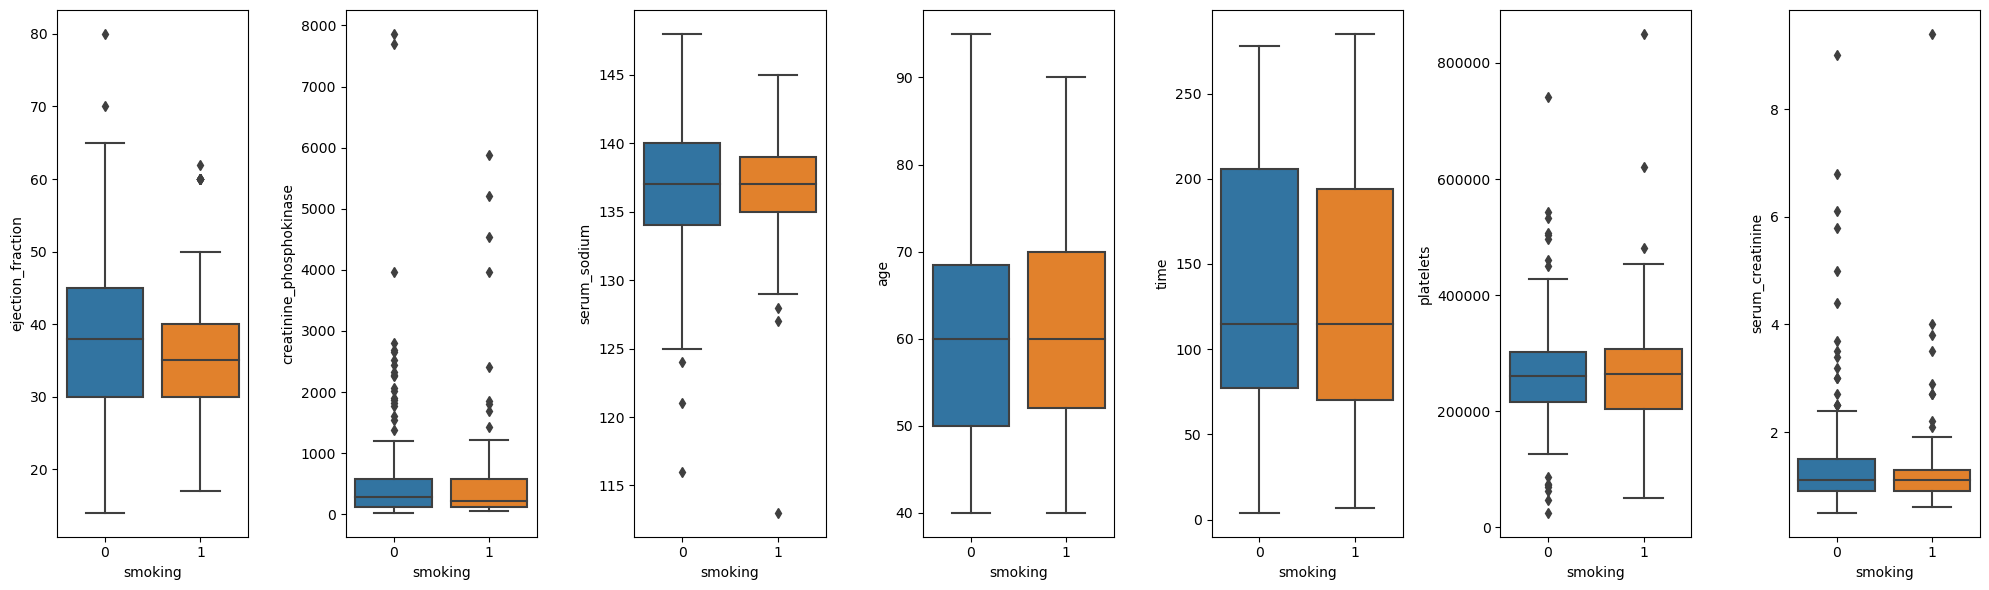

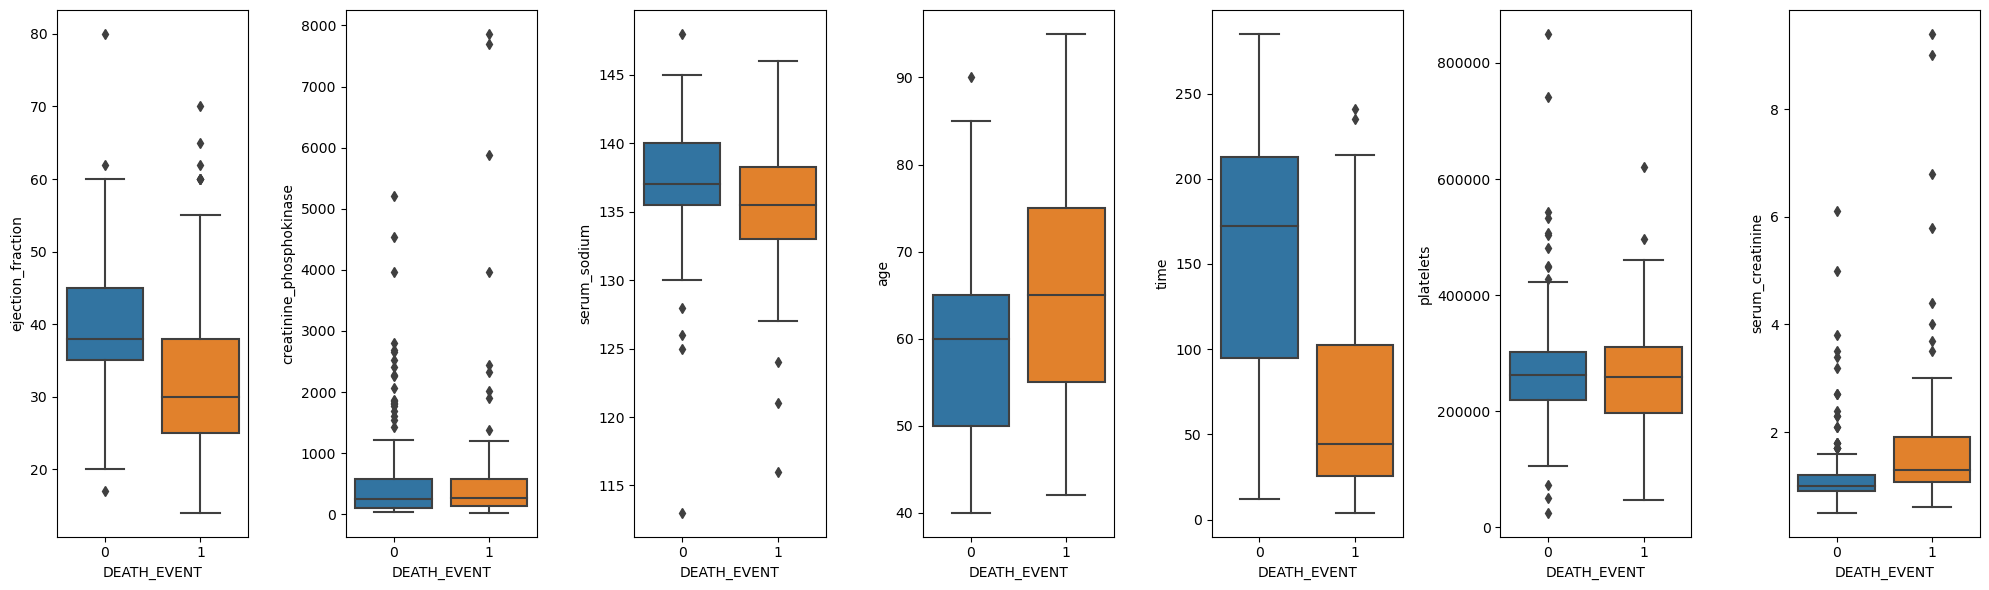

In [27]:
for i, category in enumerate(categoricals):
    fig, axis = plt.subplots(1, 7, figsize = (20, 6))
    for k in range(7):
        sns.boxplot(x = df[category], y = df[numericals[k]], ax = axis[k])
    plt.tight_layout()
    plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
lgr = LogisticRegression()
svc = SVC()

models = [rfc, abc, etc, gbc, xgb, lgr, svc]

names = ["Random Forest Classifier", "Ada Boost Classifier", "Extra Trees Classifier", "Gradient Boosting Classifier", "XGBClassifier", "Logistic Regression", "SVC"]


In [30]:
x = df.drop("DEATH_EVENT", axis = 1)
y = df["DEATH_EVENT"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [38]:
def training(model):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    score = accuracy_score(y_test, y_preds)
    report = classification_report(y_test, y_preds)
    cm = confusion_matrix(y_test, y_preds)
    return score * 100, report, cm

In [36]:
scores, reports, cms = [], {}, {}

In [39]:
for model, name in zip(models, names):
    score, report, cm = training(model)
    scores += [score]
    reports[name] = report
    cms[name] = cm

In [40]:
dt = pd.DataFrame({"scores" : scores}, index = names)
dt = dt.sort_values("scores", ascending = False)
dt["scores"] = round(dt["scores"], 2)

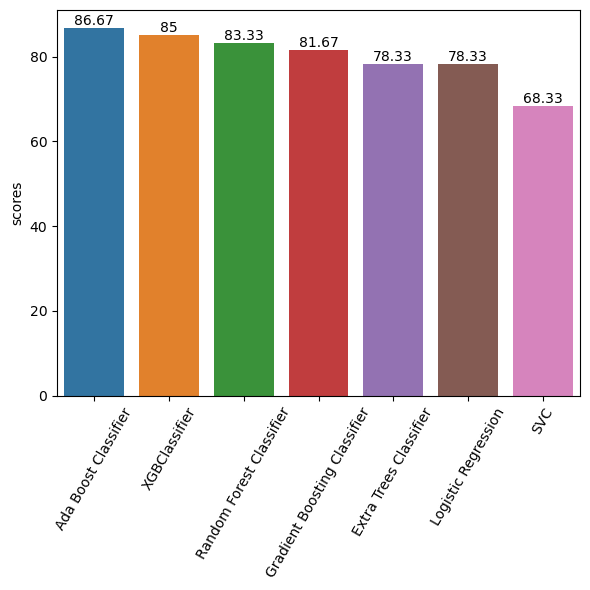

In [65]:
fig, axis = plt.subplots(figsize = (6, 6))
sns.barplot(x = dt.index, y = dt["scores"],ax = axis)
for container in axis.containers:
    axis.bar_label(container, padding = 0)
axis.set_xticklabels(axis.get_xticklabels(), rotation = 60)
plt.tight_layout()
plt.show()

for container in ax.containers:  
            ax.bar_label(container)

Explain its purpose

The code snippet `for container in ax.containers: ax.bar_label(container)` is used to add labels to the bars in a bar plot created with Matplotlib.

Let's break down its purpose:

1. `ax.containers`: This retrieves a list of containers representing the bars in the bar plot. Each container corresponds to a group of bars (e.g., all bars for a particular category or data point).

2. `for container in ax.containers:`: This iterates over each container in the list of containers.

3. `ax.bar_label(container)`: For each container (group of bars), this function adds text labels on top of each bar. The labels correspond to the heights of the bars and are typically used to display the exact numerical values represented by each bar in the plot.

So, the purpose of this code is to iterate over each group of bars in the bar plot and add text labels on top of each bar, displaying the corresponding numerical values. This can enhance the readability of the plot by providing precise information about the data represented by each bar.

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  

What would happen if this code wasn't included?

If the code `ax.set_xticklabels(ax.get_xticklabels(), rotation=90)` wasn't included, the x-axis tick labels in the plot would not be rotated by 90 degrees. 

By default, the x-axis tick labels may be displayed horizontally, which can be fine for plots with fewer categories or shorter labels. However, in plots with many categories or longer labels, the horizontal orientation may cause the labels to overlap or become difficult to read.

Including `rotation=90` in `set_xticklabels()` rotates the x-axis tick labels by 90 degrees, making them vertical. This rotation can improve readability, especially when there are many categories or longer labels, as it reduces the chance of overlapping and allows more space for each label to be displayed clearly.

In [63]:
len(cms)

7

In [64]:
cms

{'Random Forest Classifier': array([[39,  2],
        [ 8, 11]], dtype=int64),
 'Ada Boost Classifier': array([[41,  0],
        [ 8, 11]], dtype=int64),
 'Extra Trees Classifier': array([[40,  1],
        [12,  7]], dtype=int64),
 'Gradient Boosting Classifier': array([[38,  3],
        [ 8, 11]], dtype=int64),
 'XGBClassifier': array([[39,  2],
        [ 7, 12]], dtype=int64),
 'Logistic Regression': array([[36,  5],
        [ 8, 11]], dtype=int64),
 'SVC': array([[41,  0],
        [19,  0]], dtype=int64)}

In [69]:
cms.pop("SVC")

array([[41,  0],
       [19,  0]], dtype=int64)

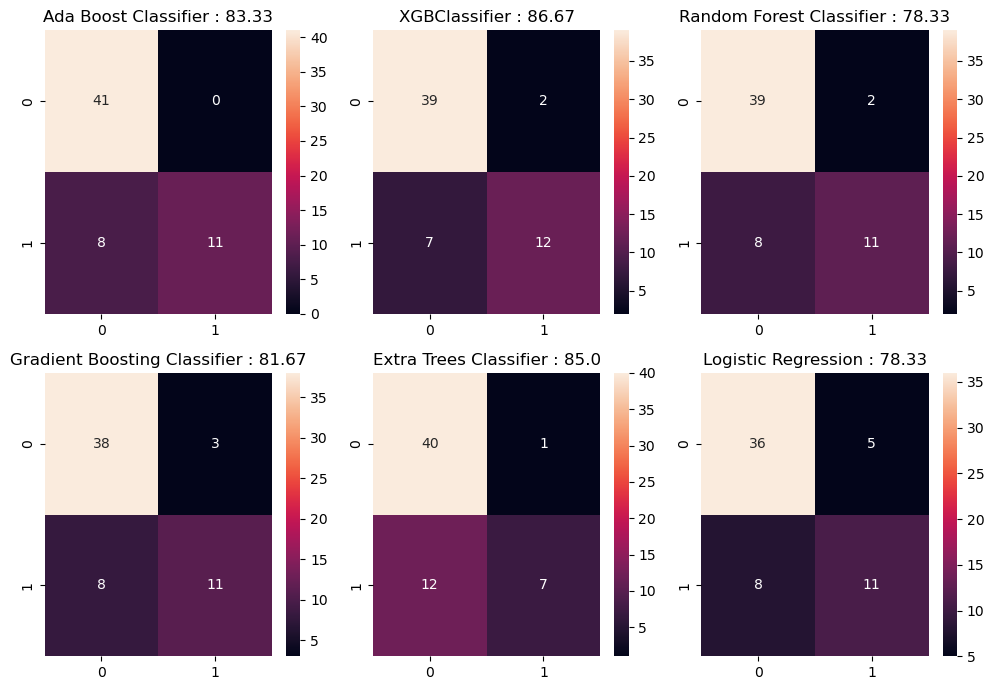

In [72]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))
index = 0
for i in range(2):
    for j in range(3):
        sns.heatmap(cms[dt.index[index]], annot = True, ax = axis[i][j])
        axis[i][j].set_title(f"{dt.index[index]} : {round(scores[index], 2)}")
        index += 1
plt.tight_layout()
plt.show()

In [74]:
for name in dt.index:
    print("*" * 30)
    print(f"Classification report for {name}:")
    print(reports[name])

******************************
Classification report for Ada Boost Classifier:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        41
           1       1.00      0.58      0.73        19

    accuracy                           0.87        60
   macro avg       0.92      0.79      0.82        60
weighted avg       0.89      0.87      0.85        60

******************************
Classification report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60

******************************
Classification report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
   